In [1]:
run ../data_utils.py

In [2]:
import matplotlib.pyplot as plt

In [3]:
C.JSON_DATA_PATH = '../../data/json_data'

def raw_dataframe(category):
    with open('%s/%s.pickle' % (C.JSON_DATA_PATH, category), 'rb') as f:
        return pd.read_pickle(f)

In [4]:
def getLengths(row):
    reviewsList = row['reviewsList']
    reviewsLengthList = []
    for review in reviewsList:
        tokens = review['text'].split()
        reviewsLengthList.append(len(tokens))
    
    questionsList = row['questionsList']
    questionsLengthList = []
    answersLengthList = []
    
    for question in questionsList:
        tokens = question['text'].split()
        questionsLengthList.append(len(tokens))
        
        answersList = question['answers']
        for answer in answersList:
            tokens = answer['text'].split()
            answersLengthList.append(len(tokens))
    
    return (reviewsLengthList, questionsLengthList, answersLengthList)

In [5]:
def get_length_lists(category):
    df = raw_dataframe(category)
    df['lengthsList'] = df[['reviewsList', 'questionsList']].apply(getLengths, axis=1)
    reviewsLengthList = []
    questionsLengthList = []
    answersLengthList = []

    for (r, q, a) in df['lengthsList']:
        reviewsLengthList.extend(r)
        questionsLengthList.extend(q)
        answersLengthList.extend(a)
    return reviewsLengthList, questionsLengthList, answersLengthList

In [6]:
def get_percentiles(lst, every):
    lst = sorted(lst)
    diff = int(len(lst) * (every/100))
    return lst[diff-1::diff]

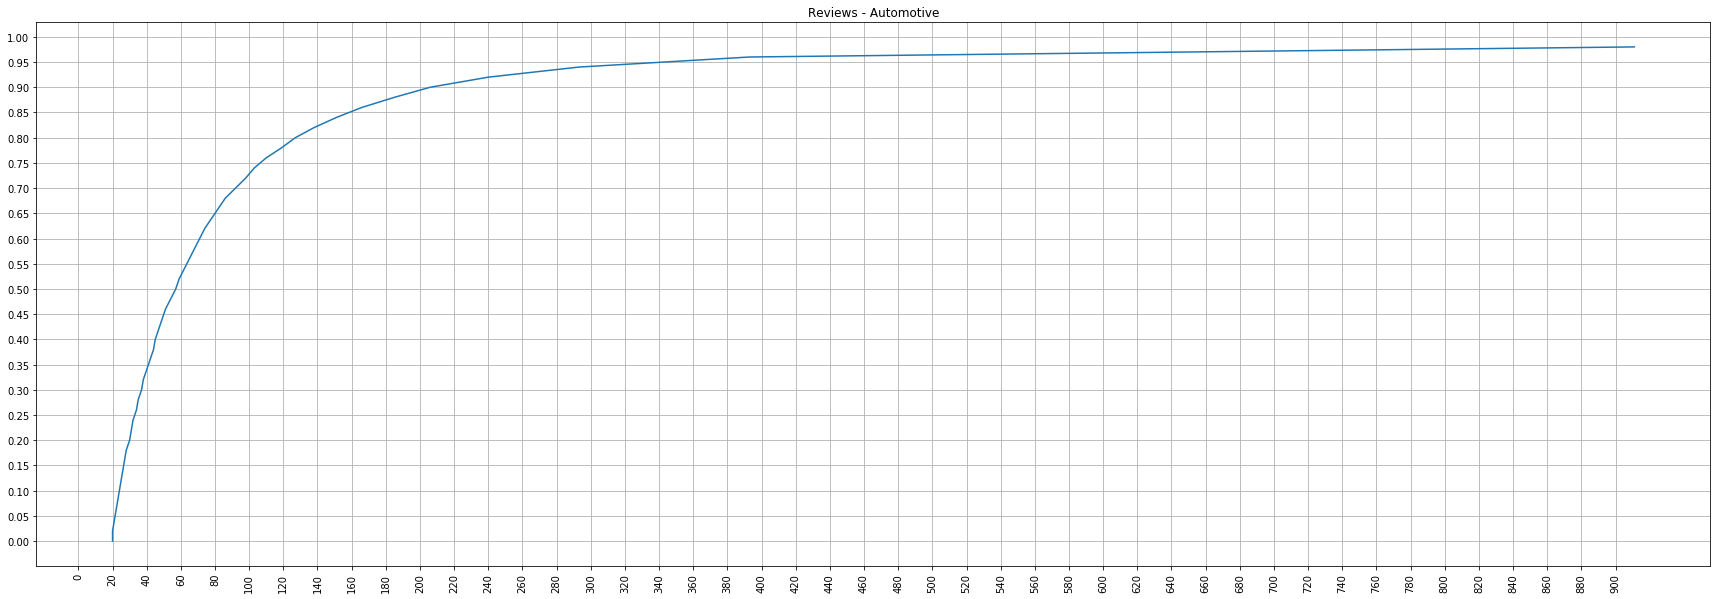

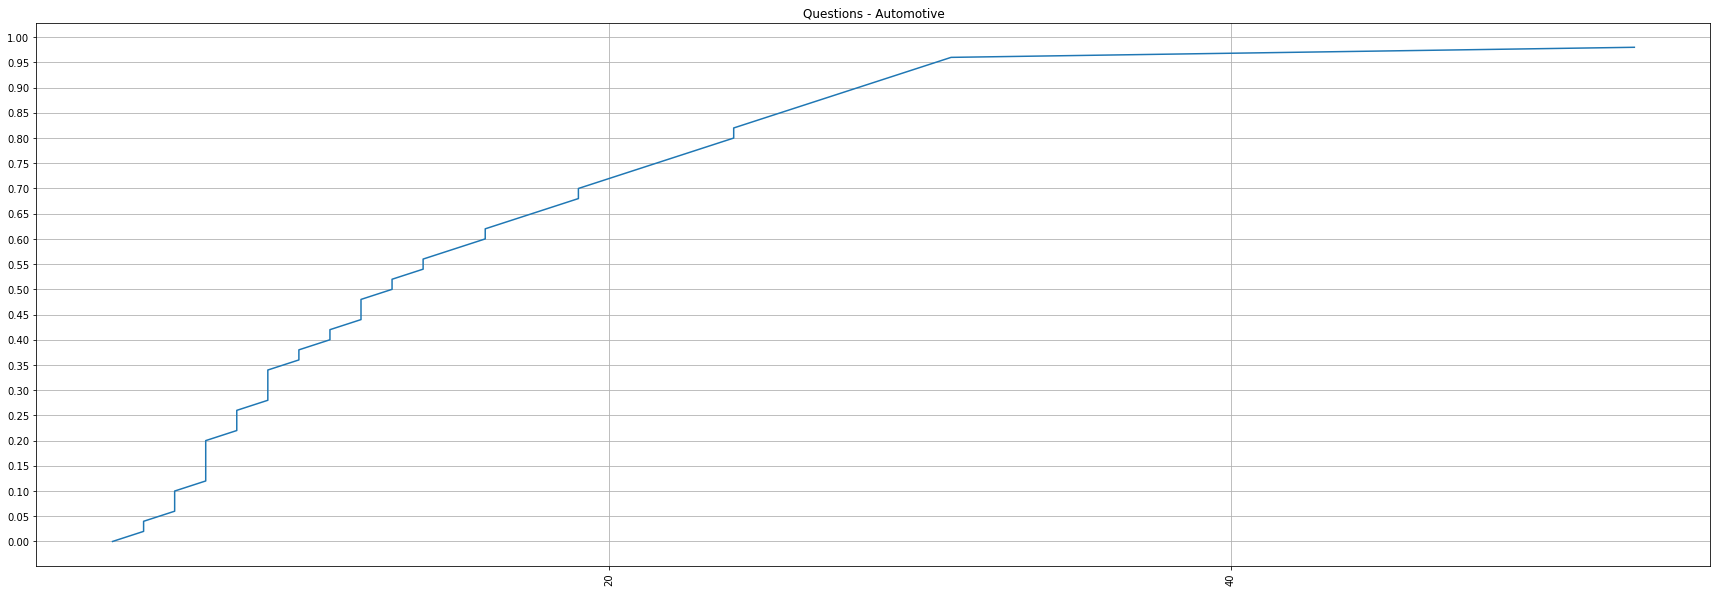

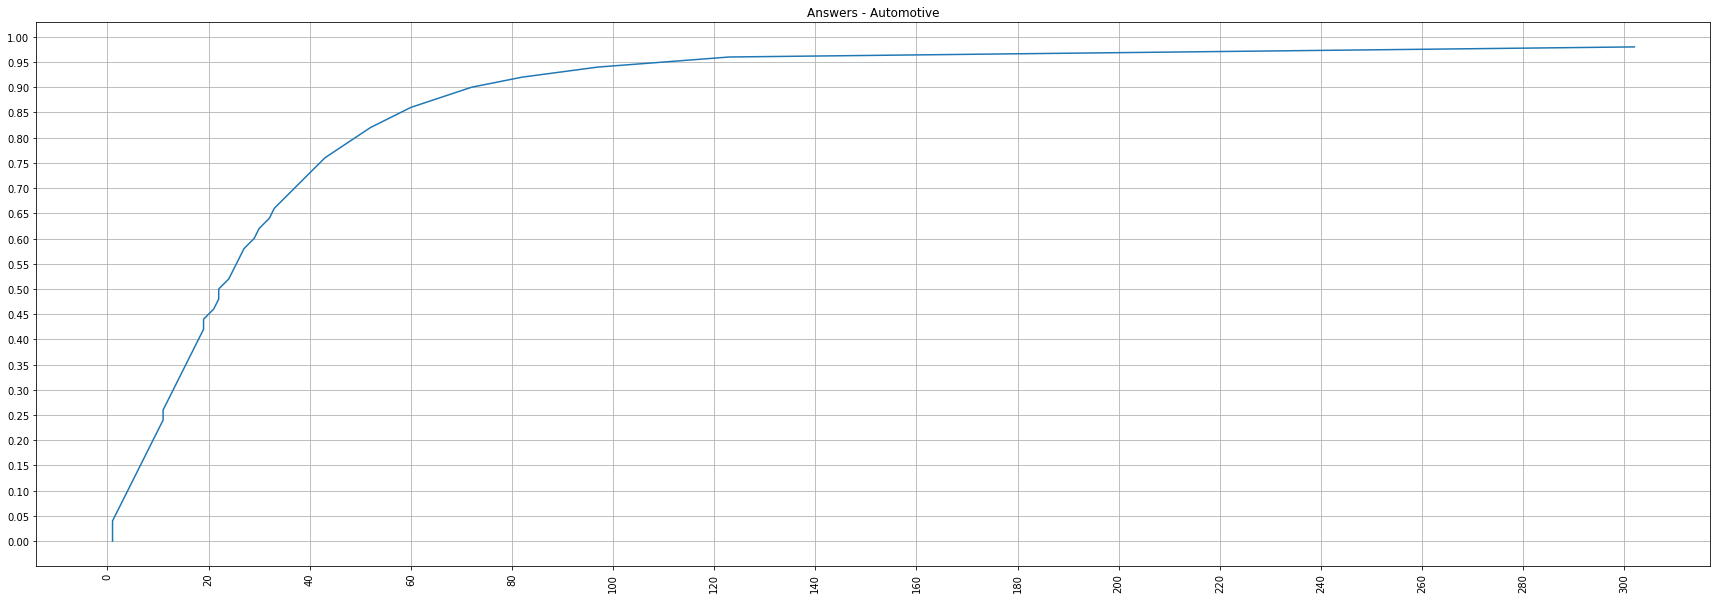

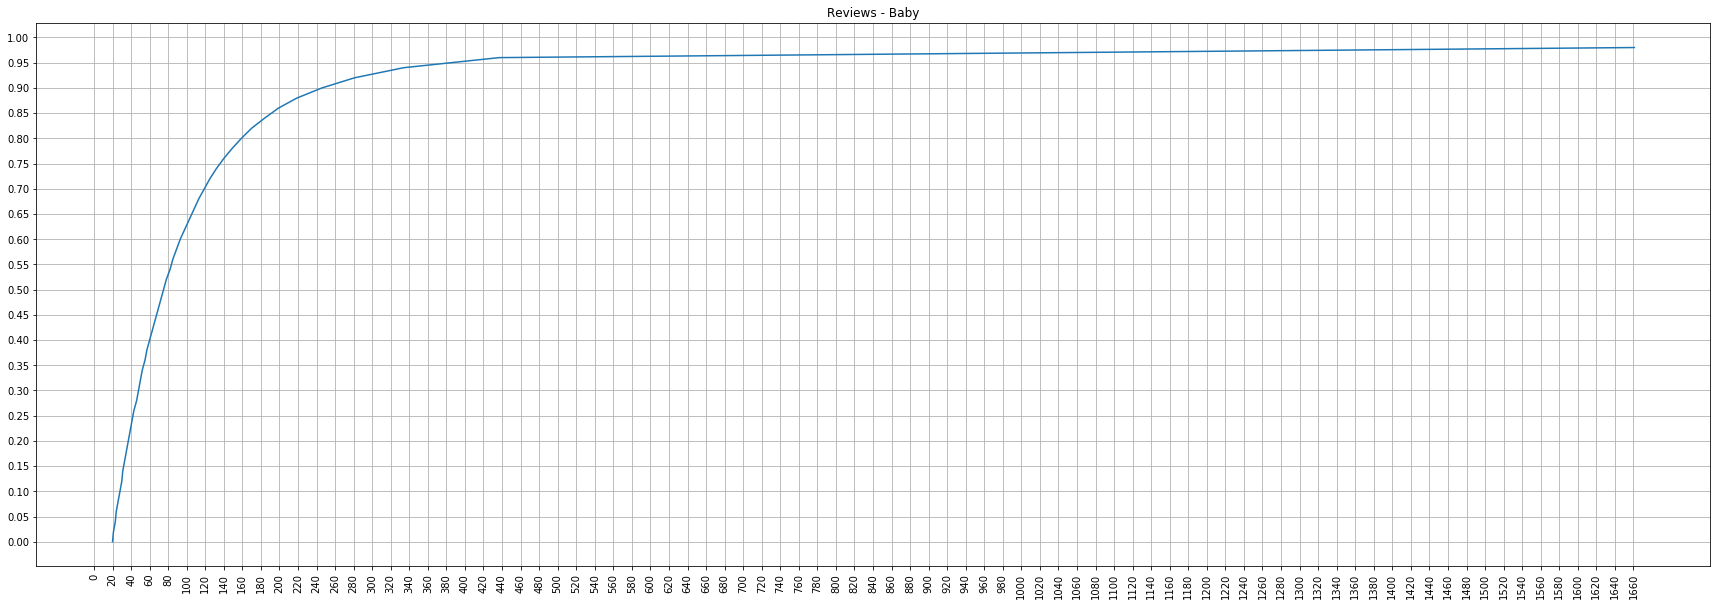

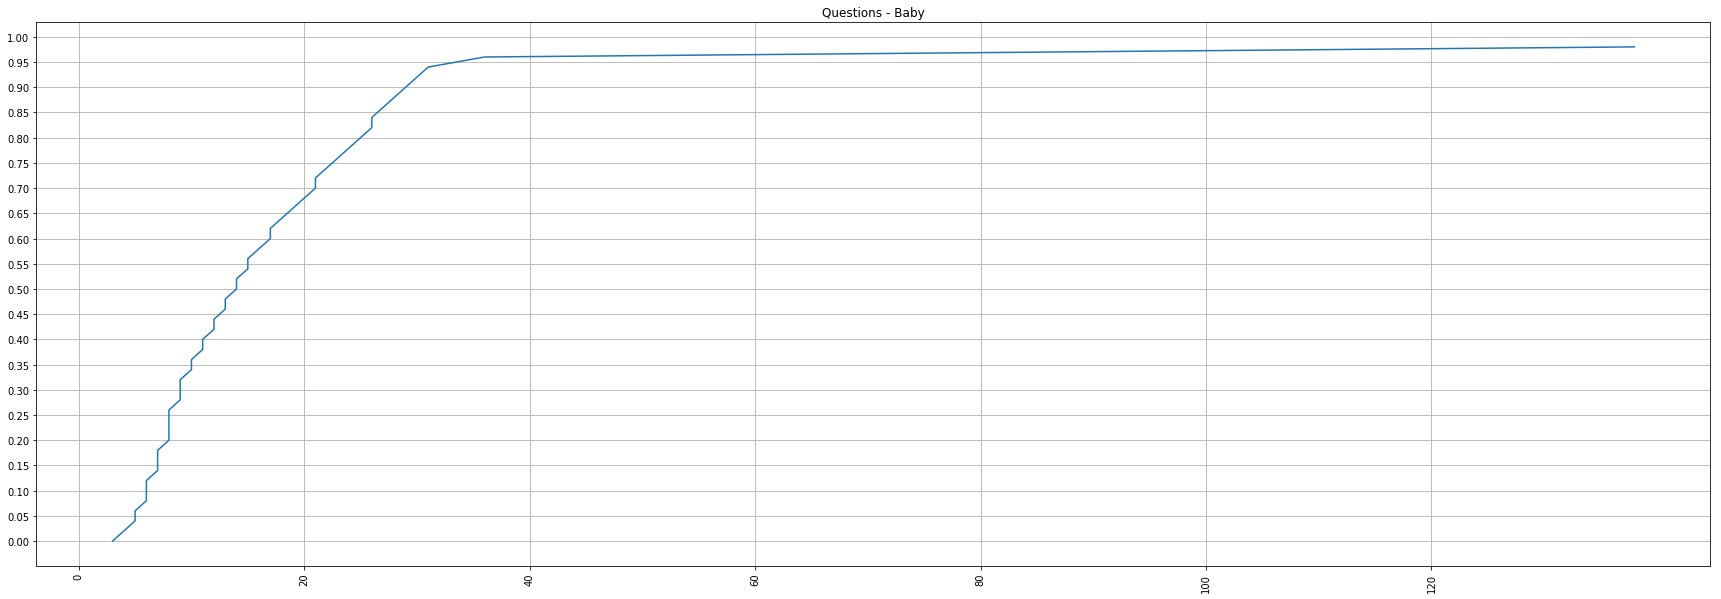

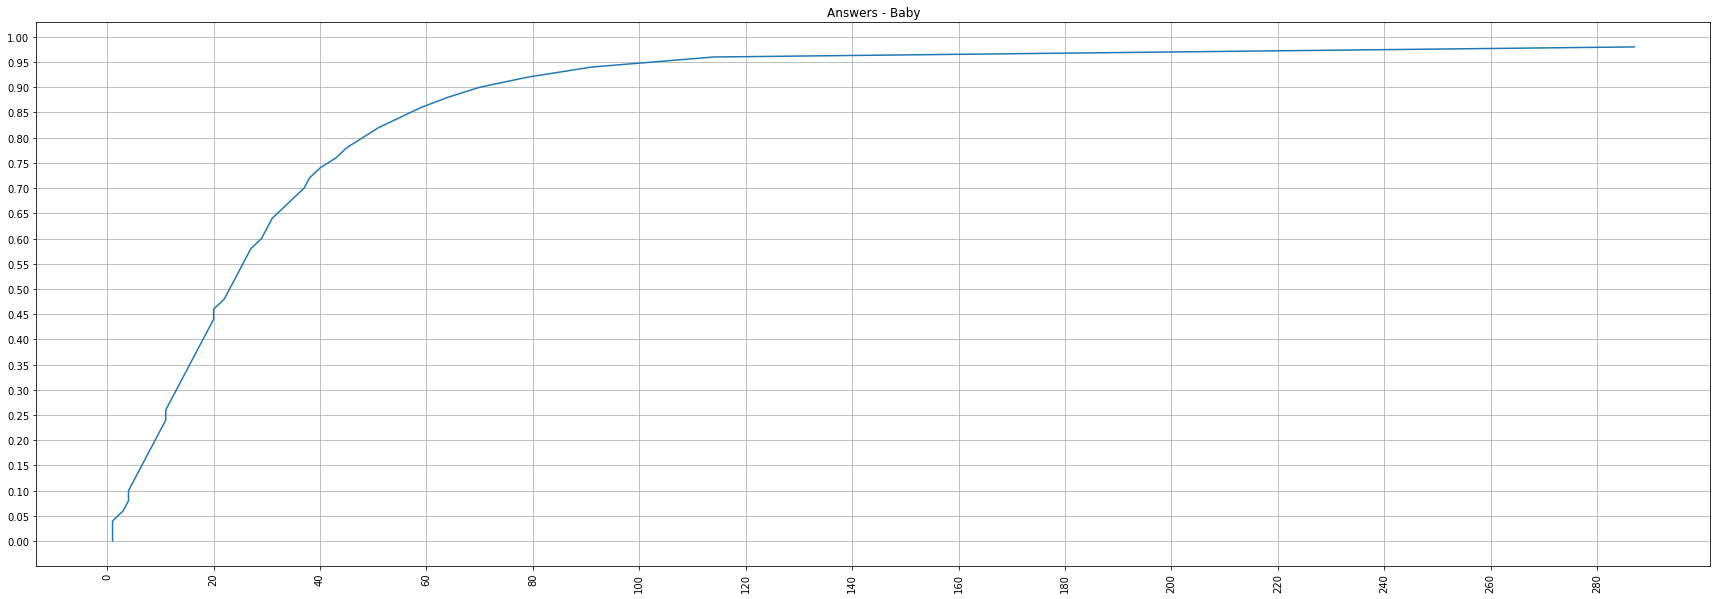

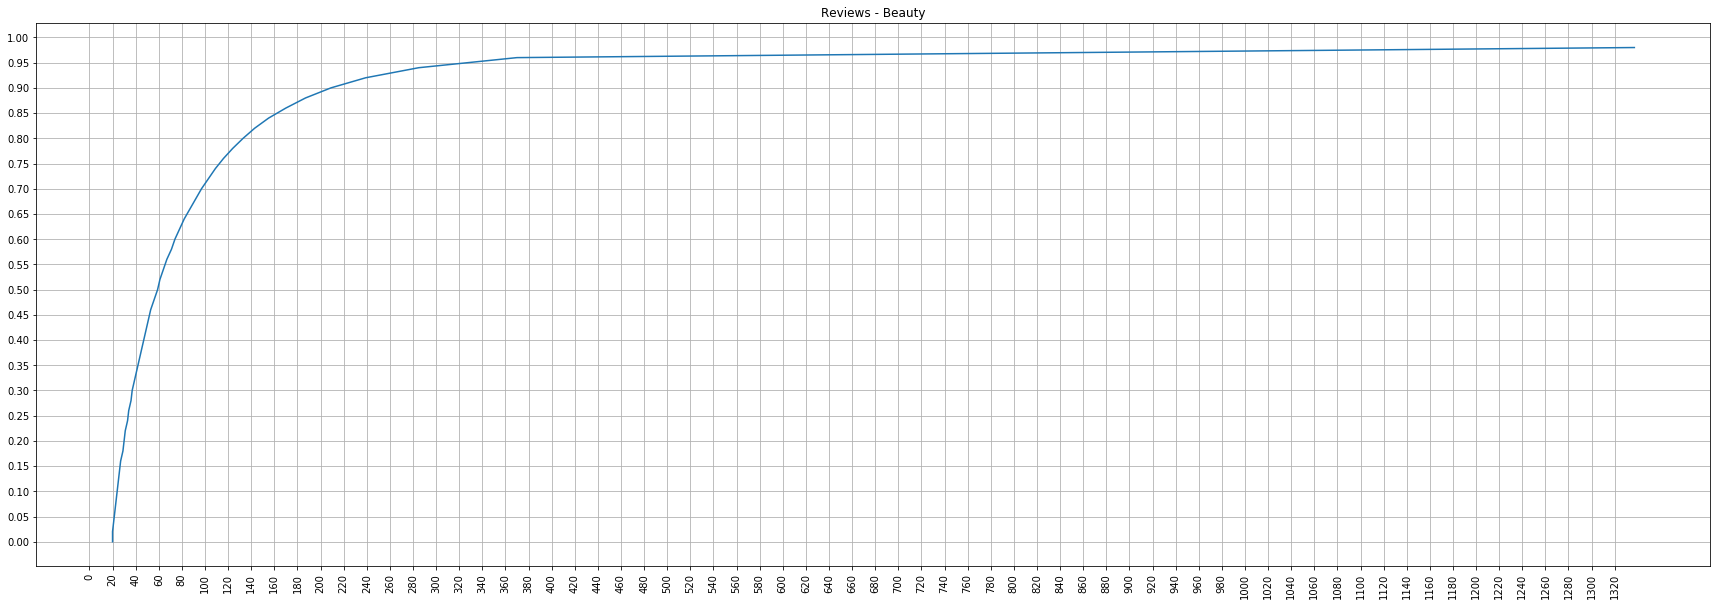

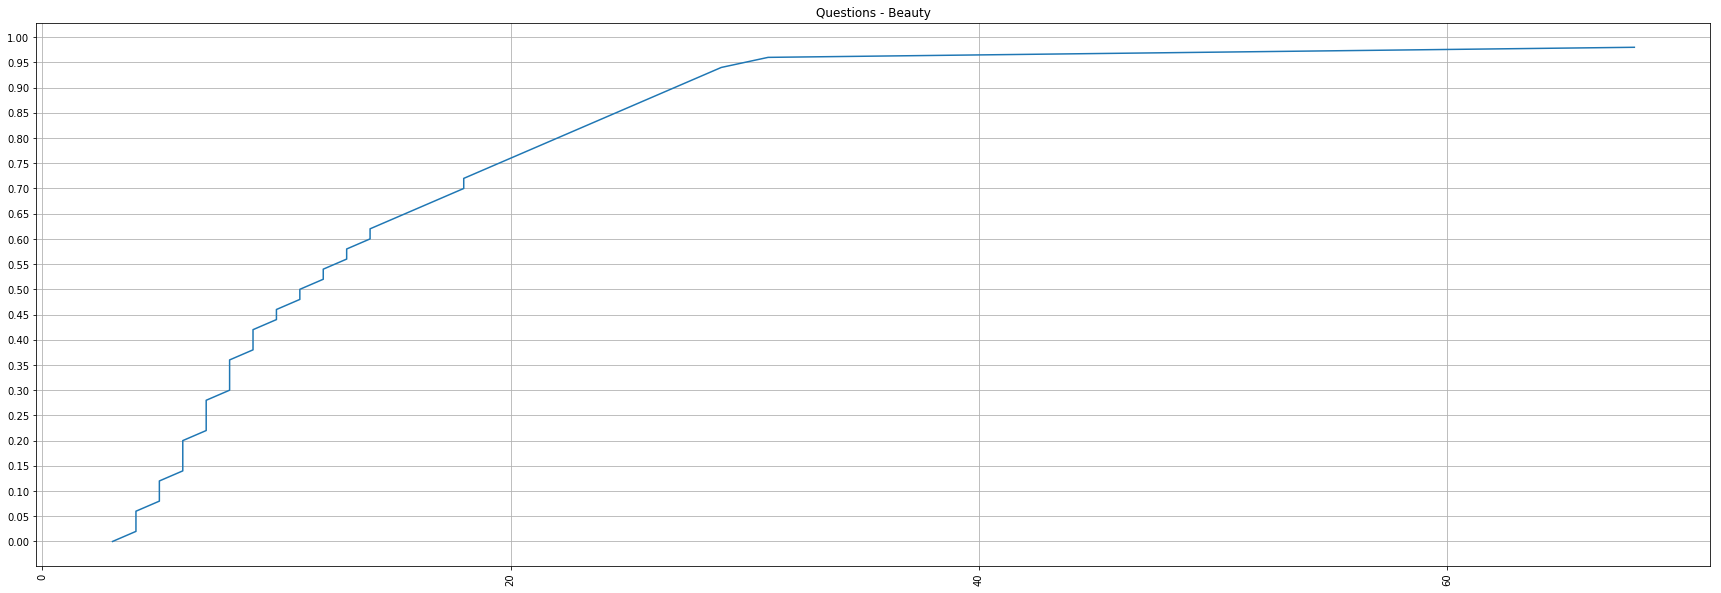

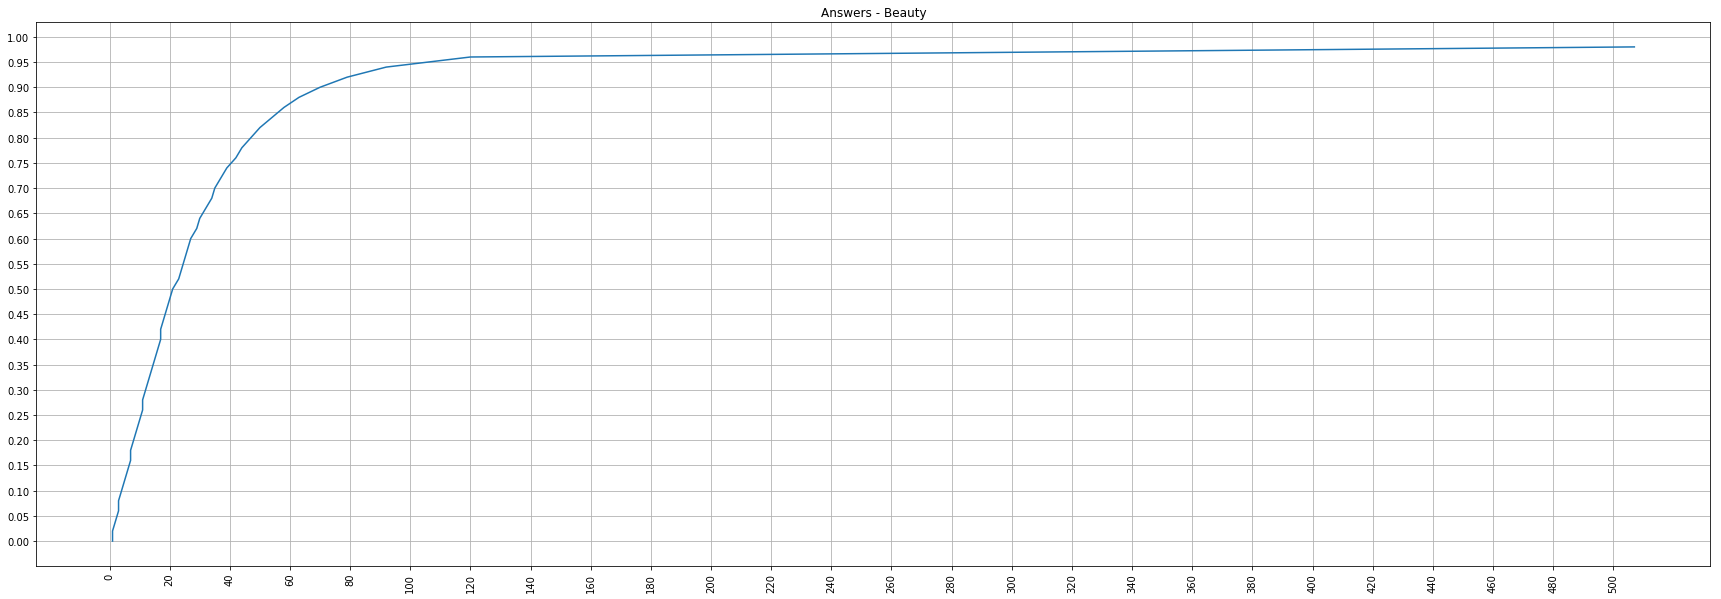

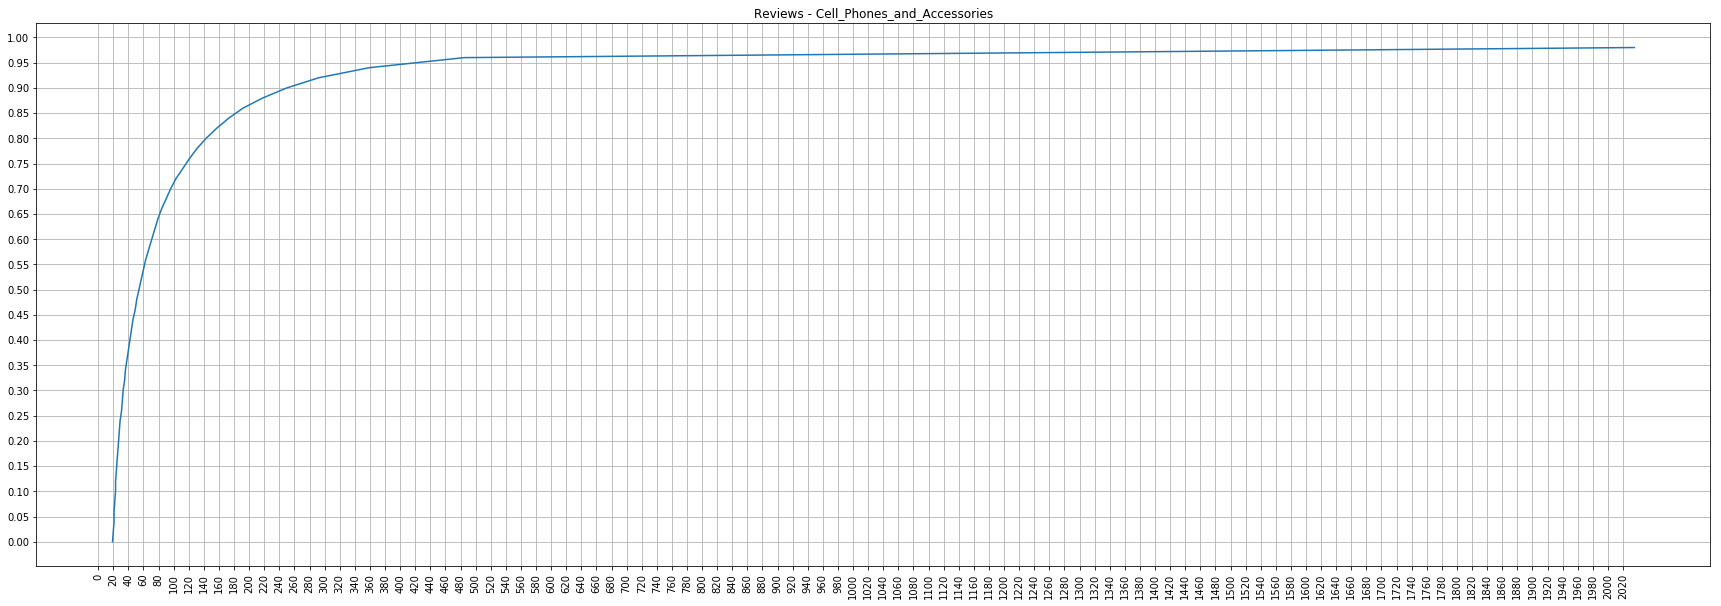

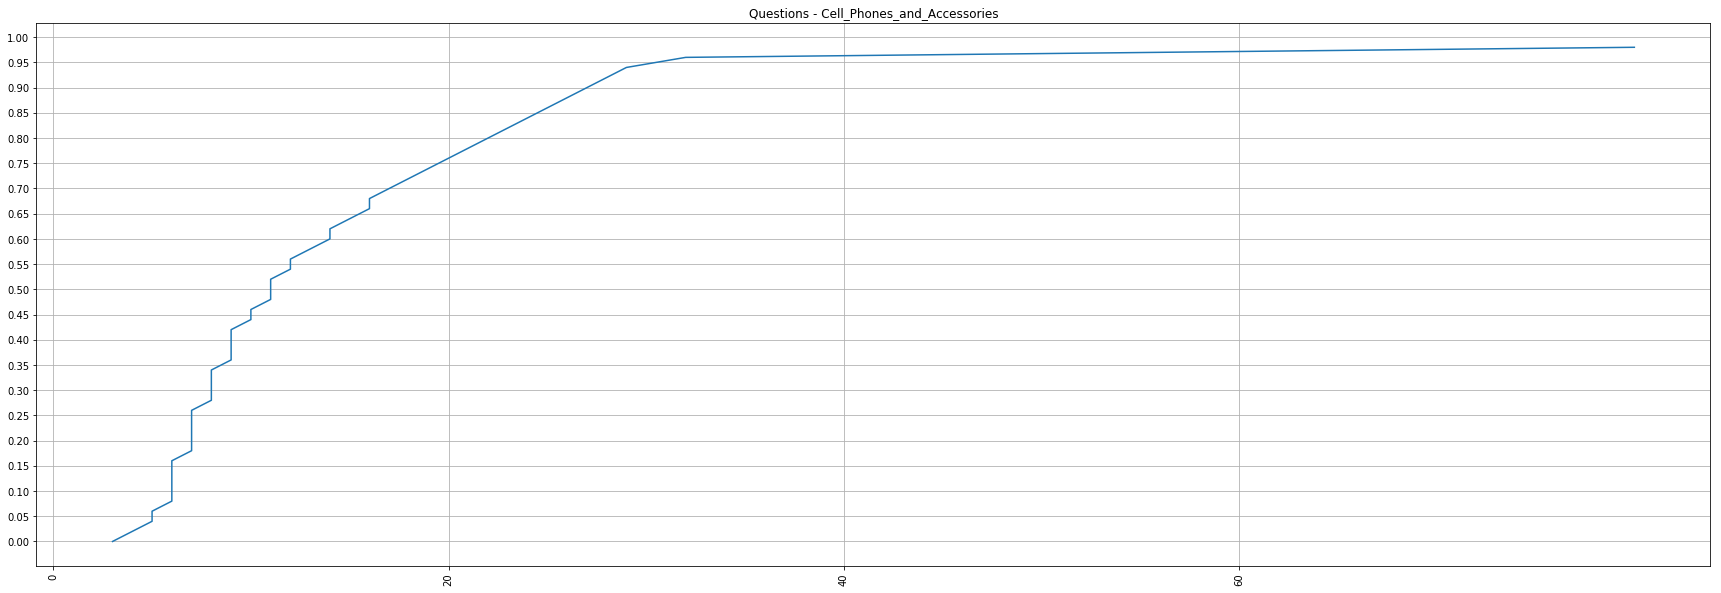

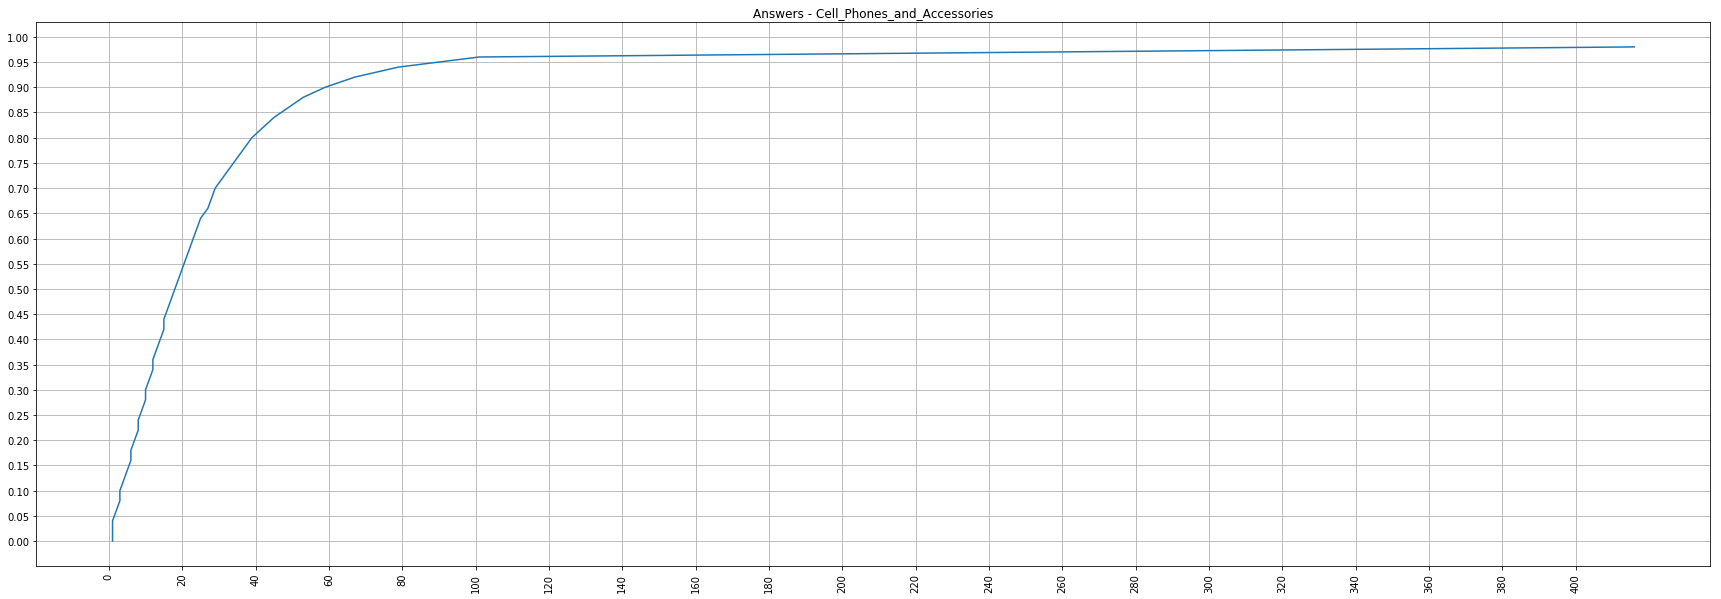

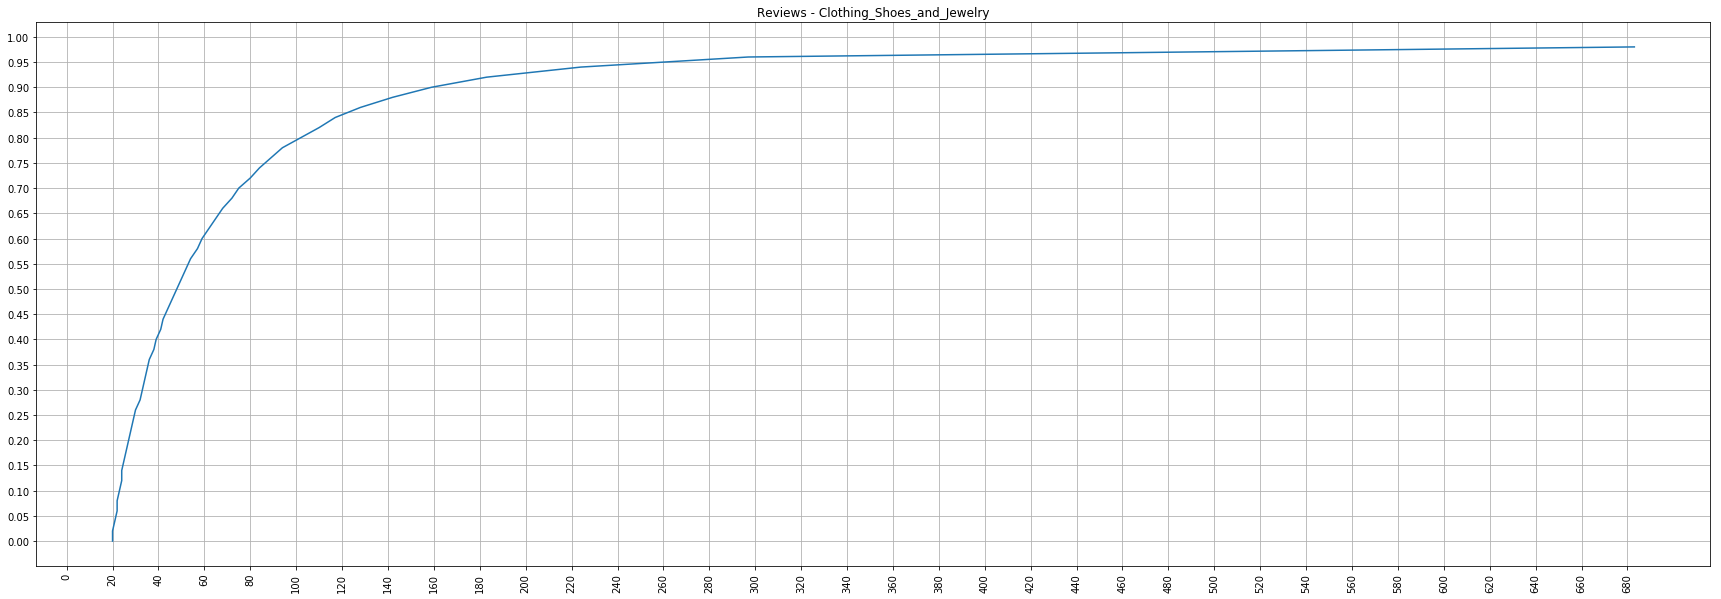

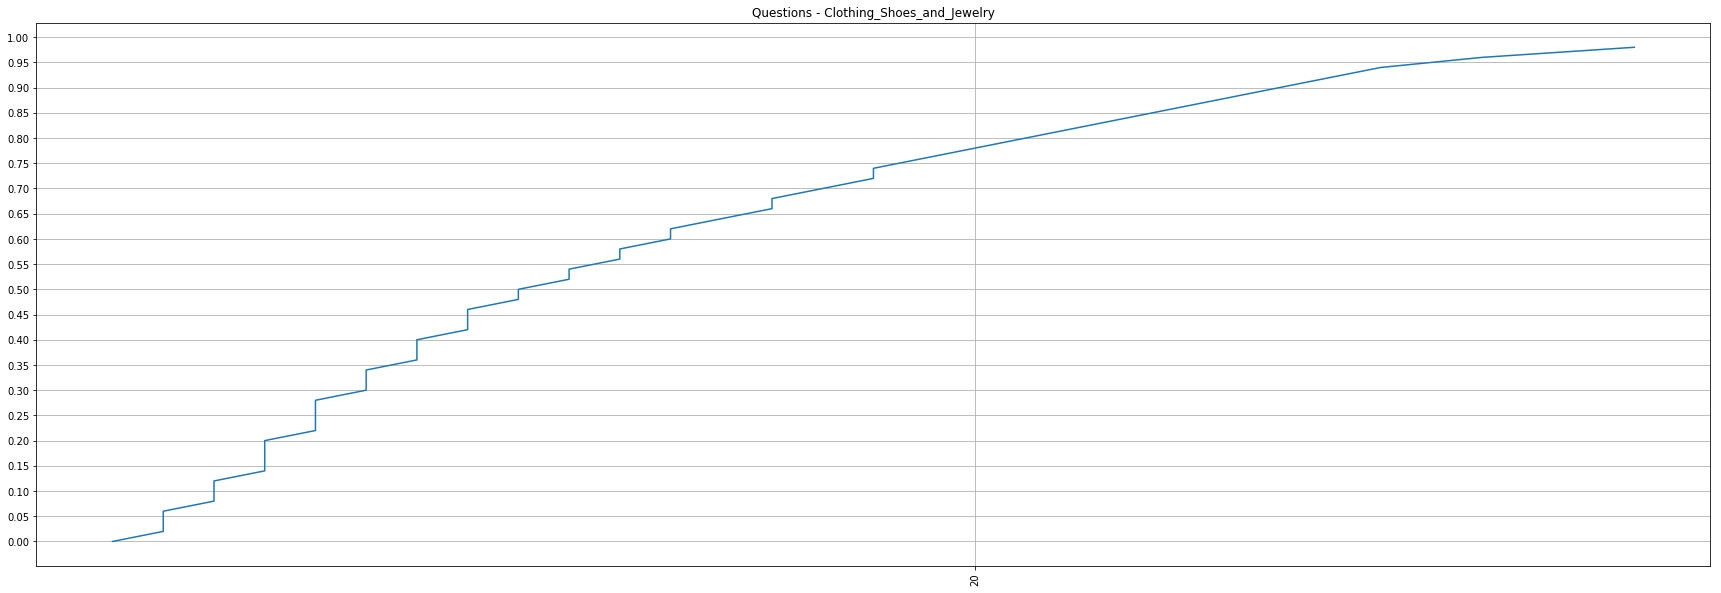

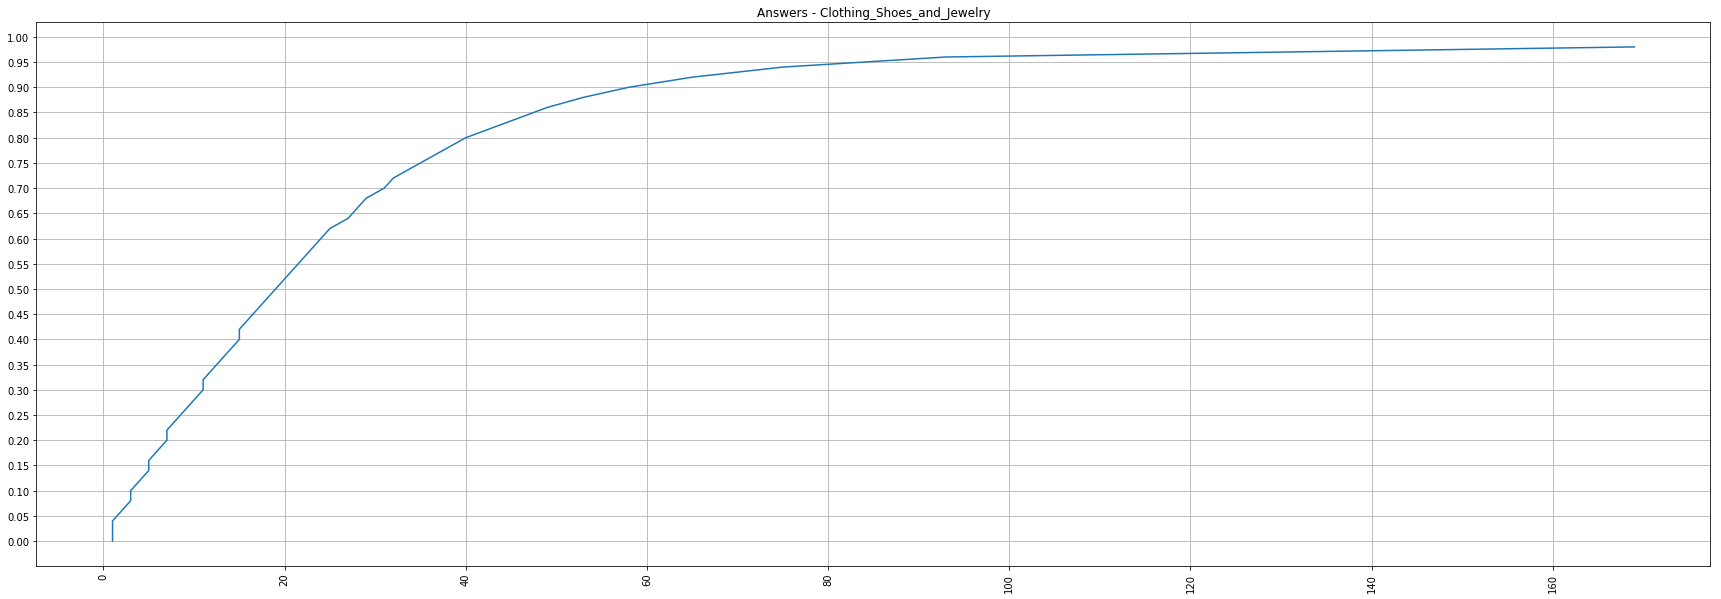

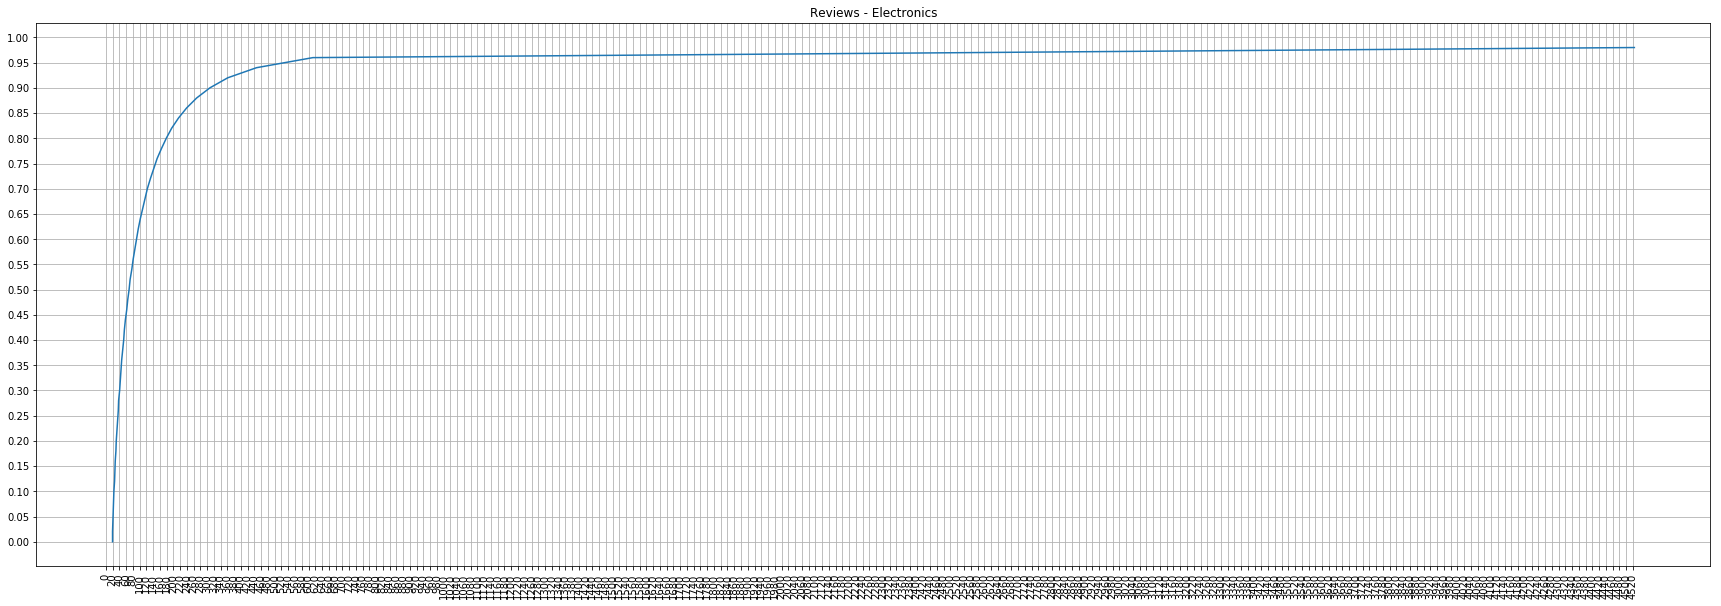

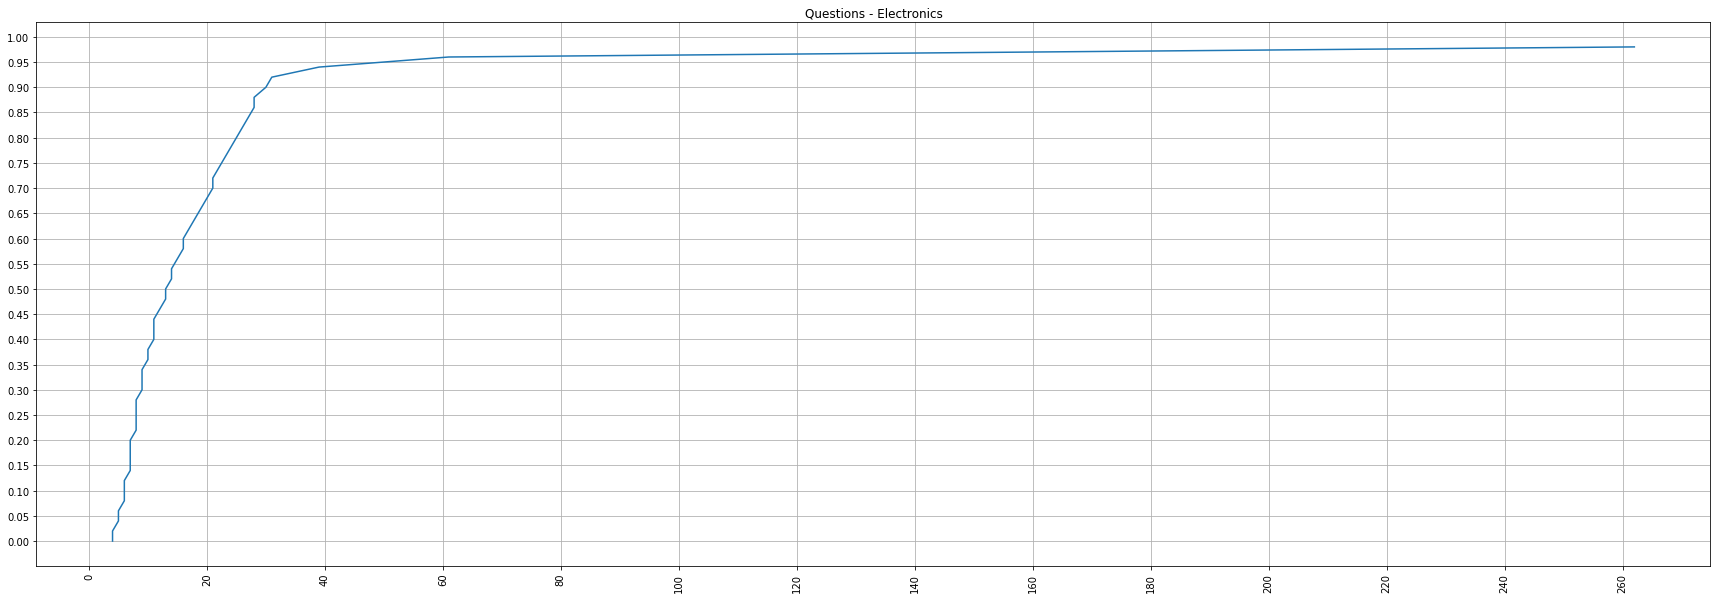

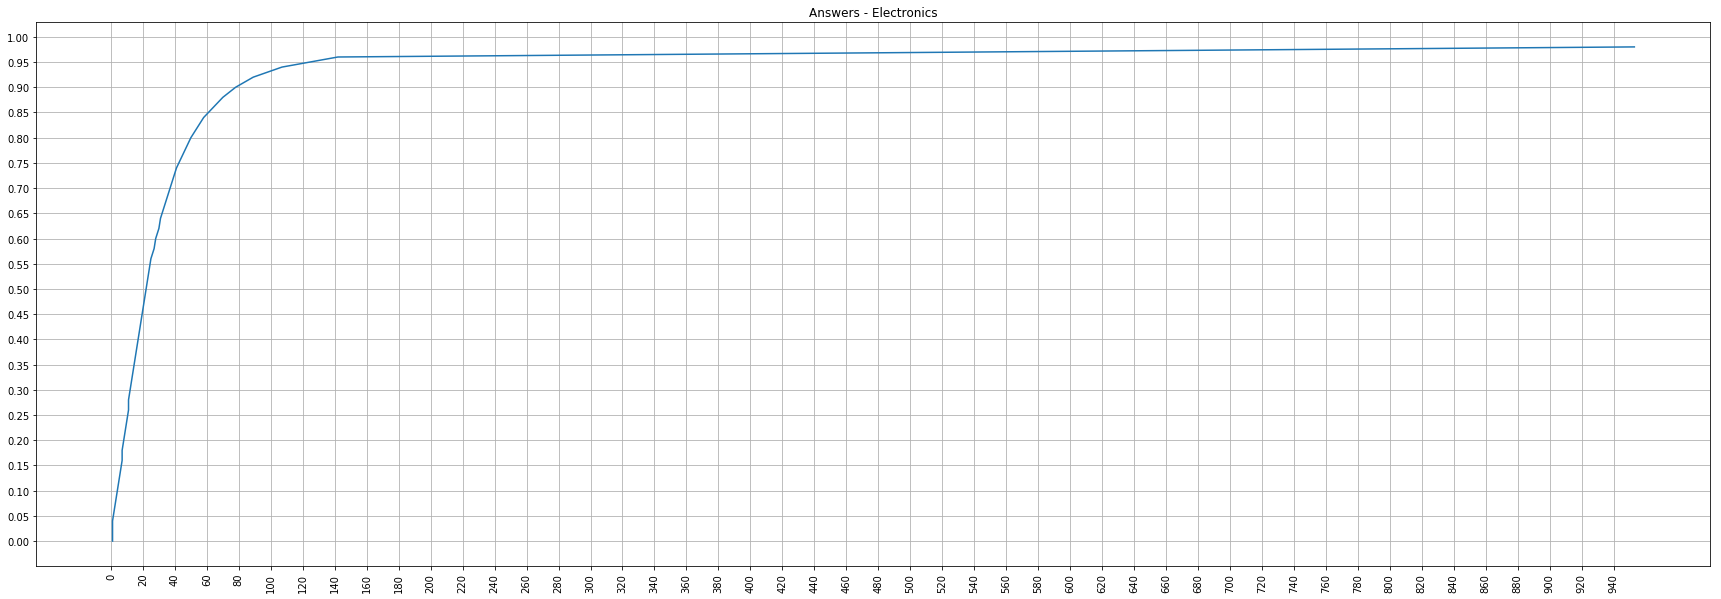

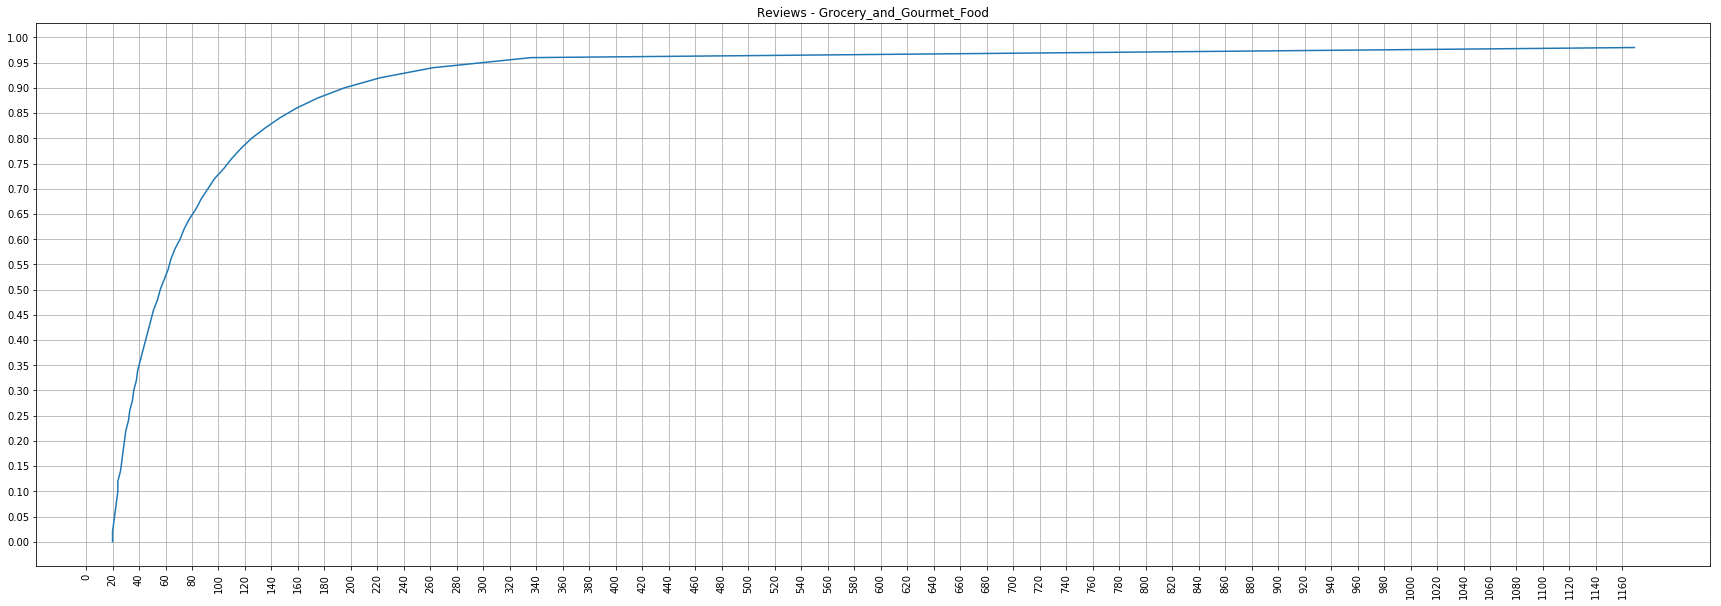

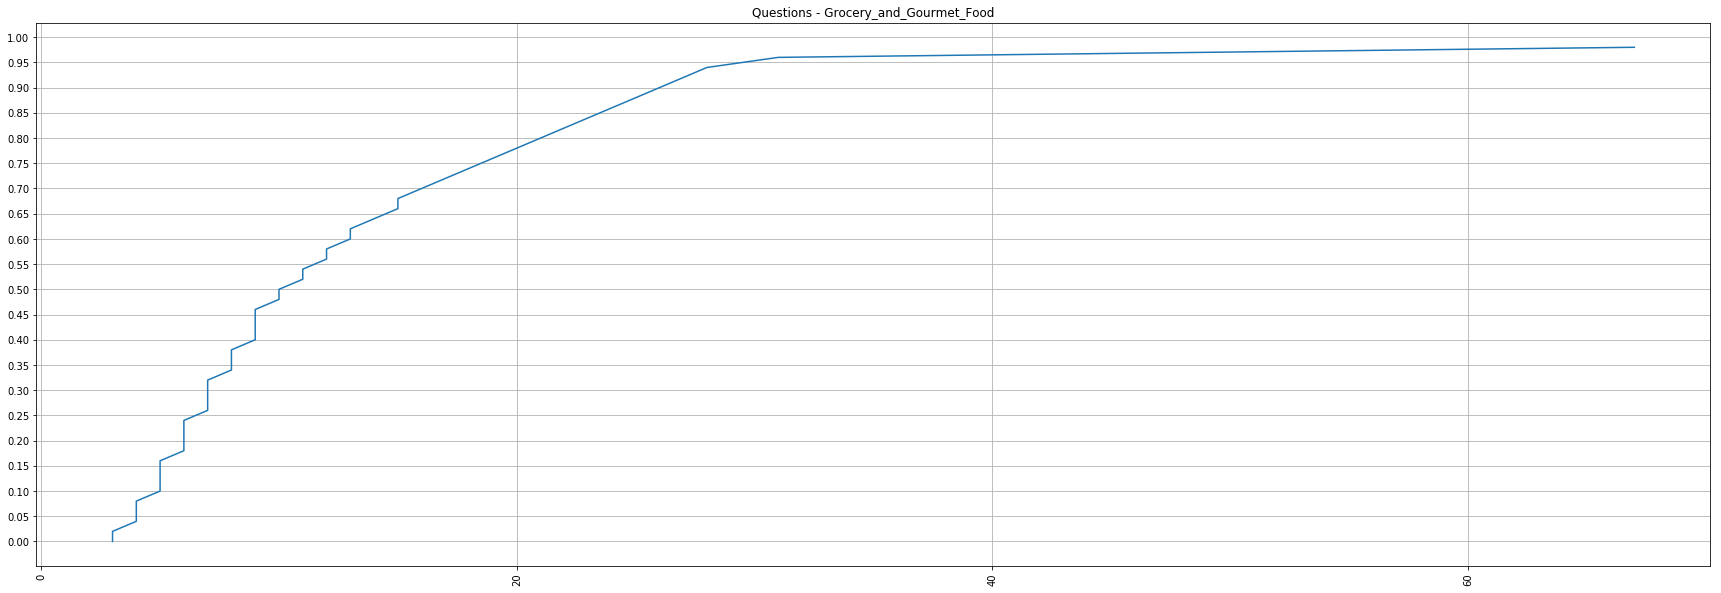

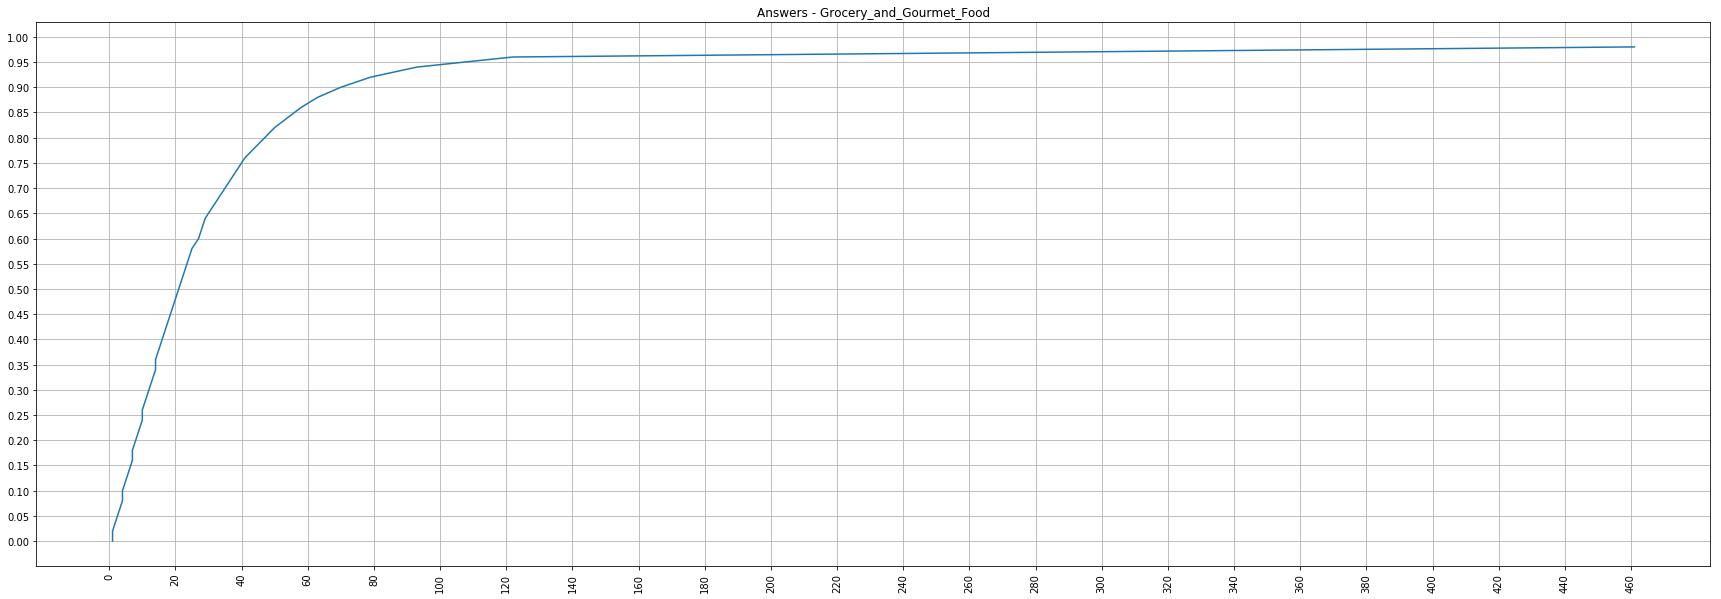

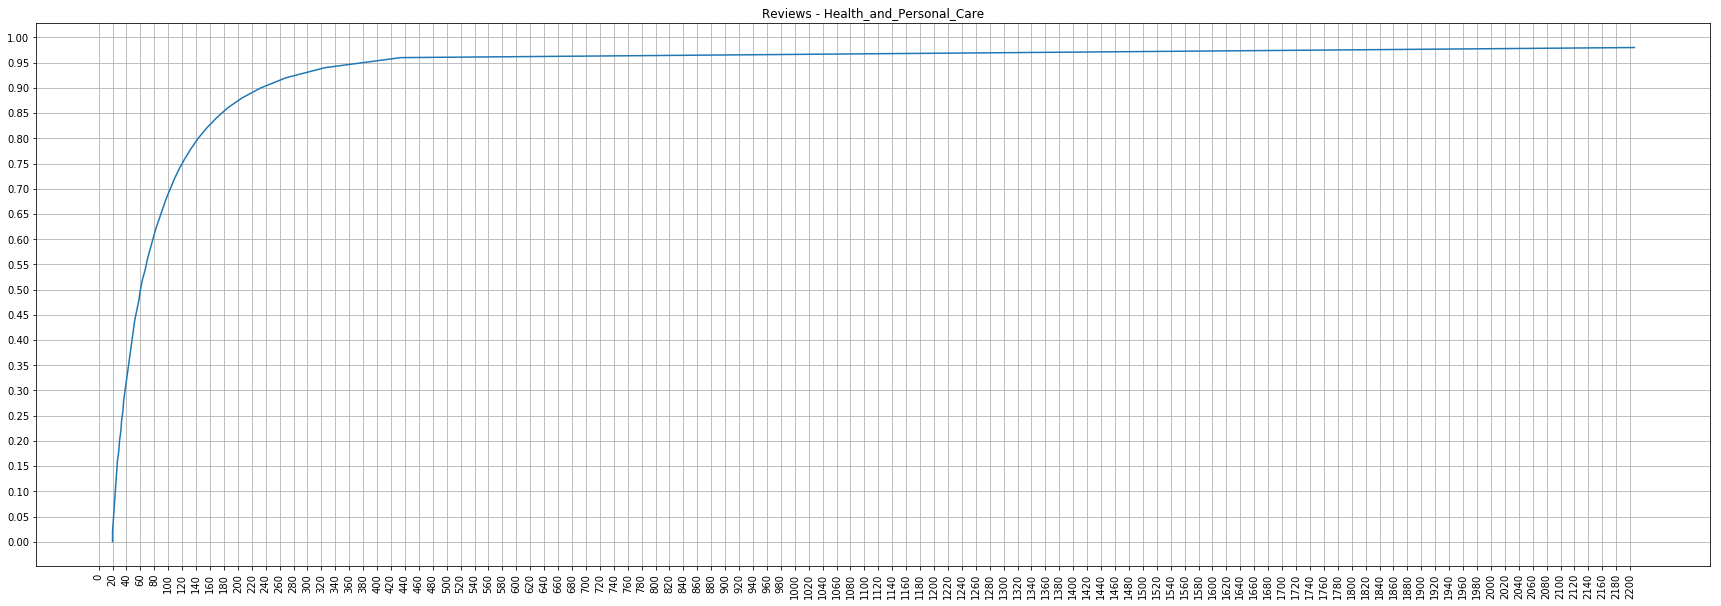

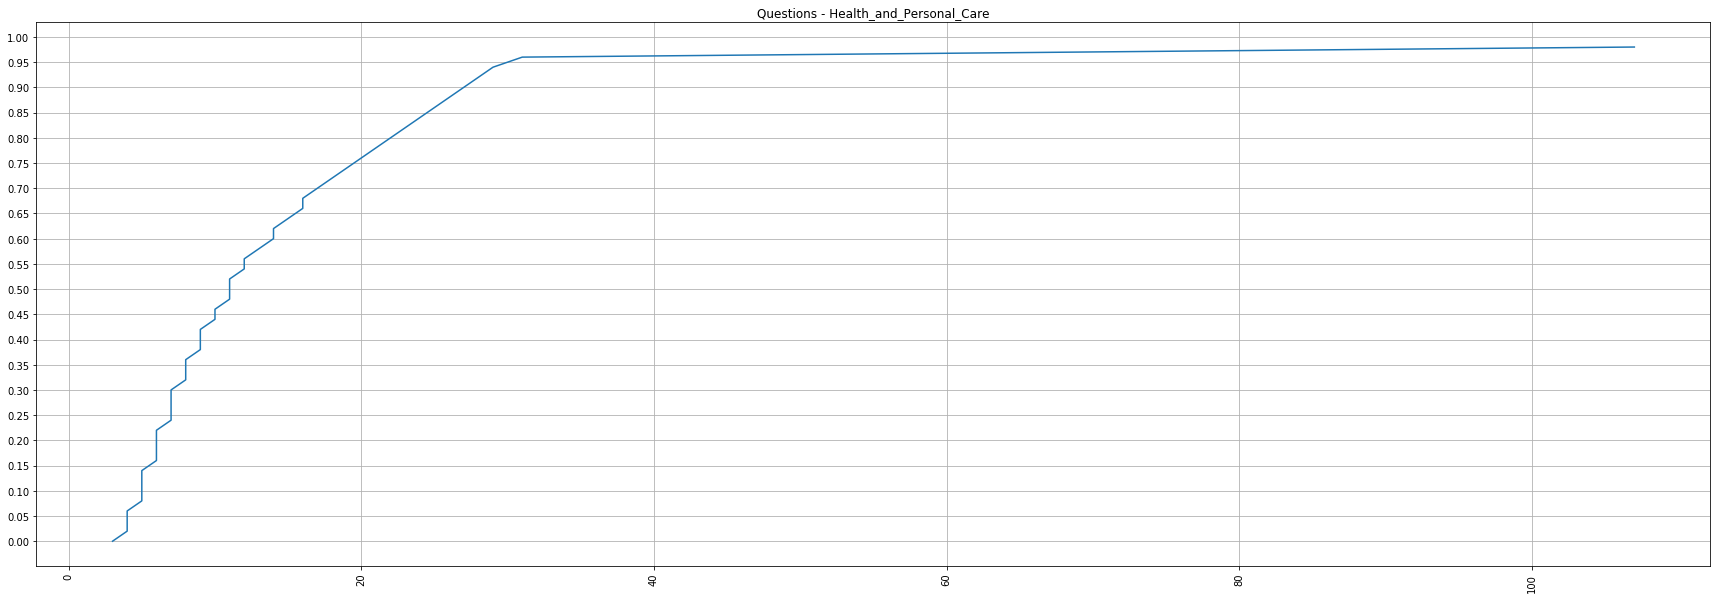

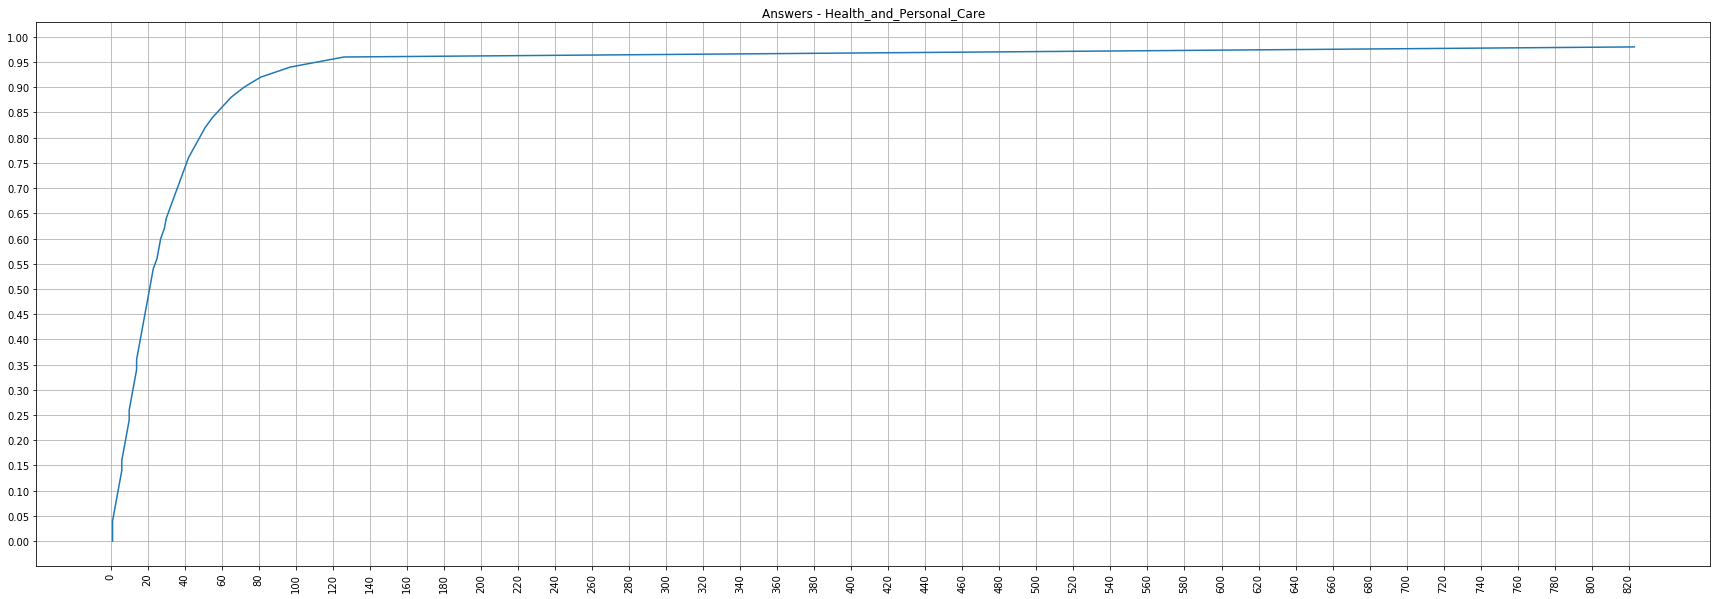

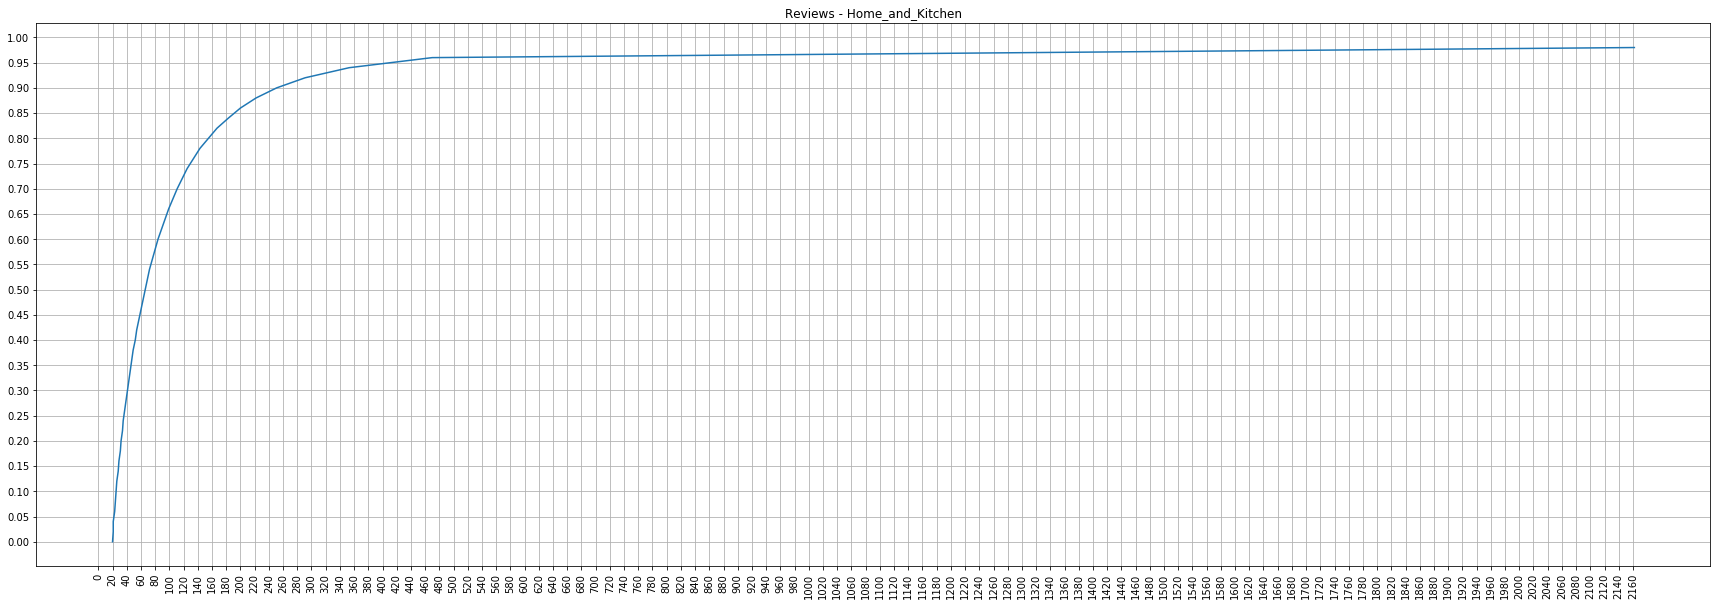

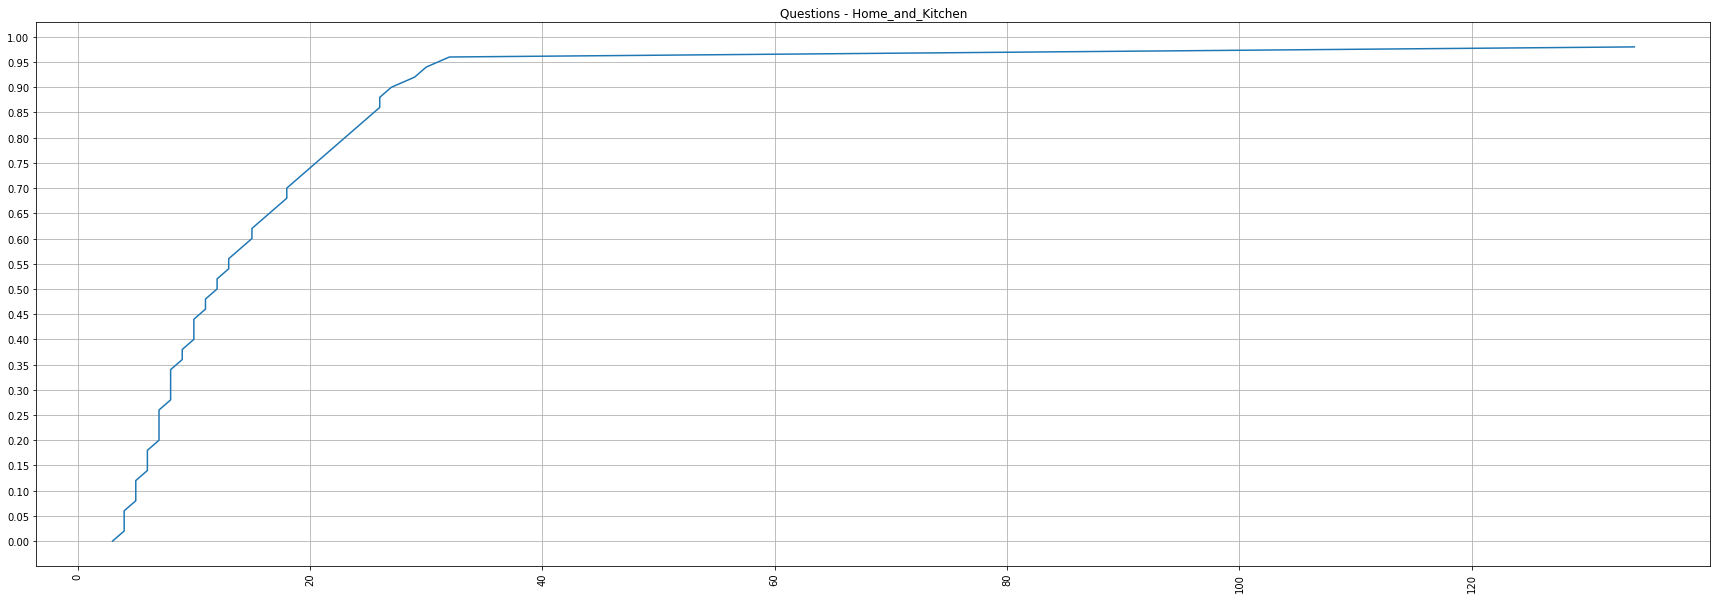

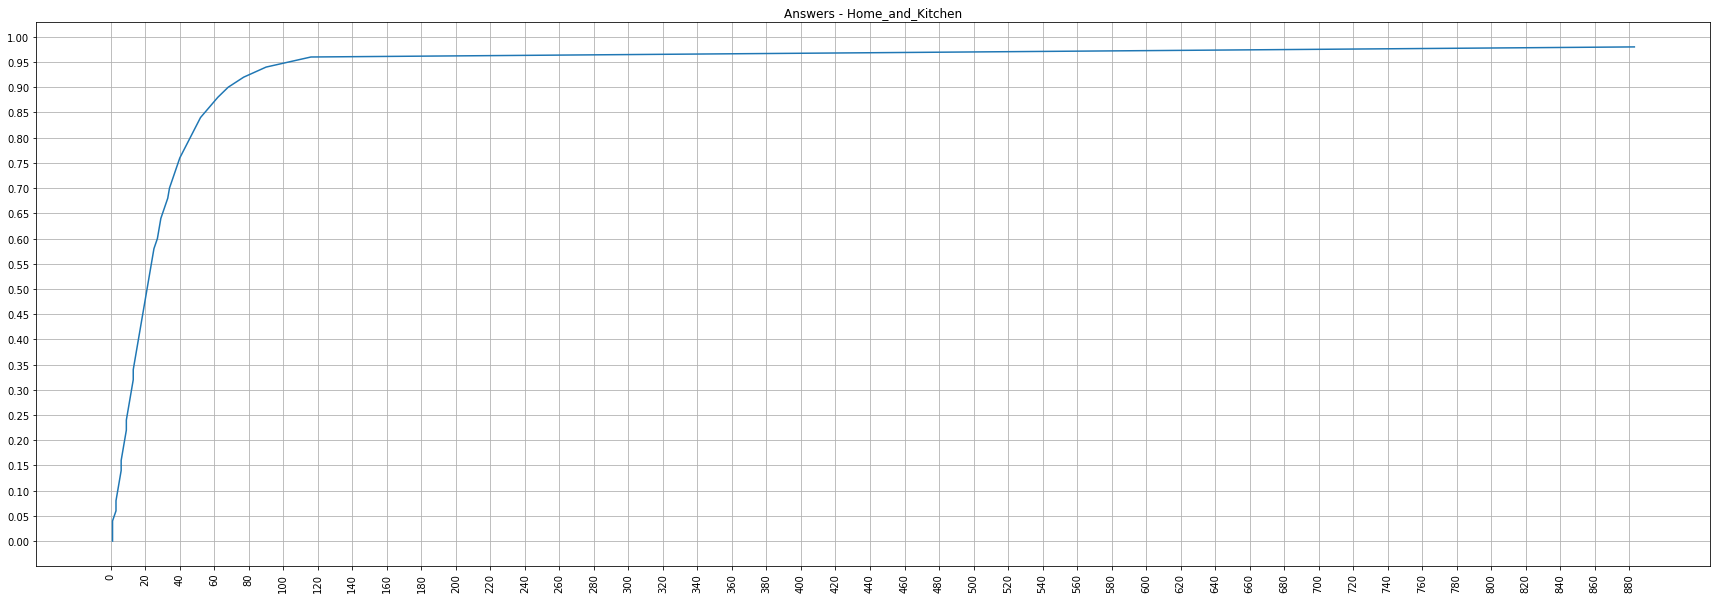

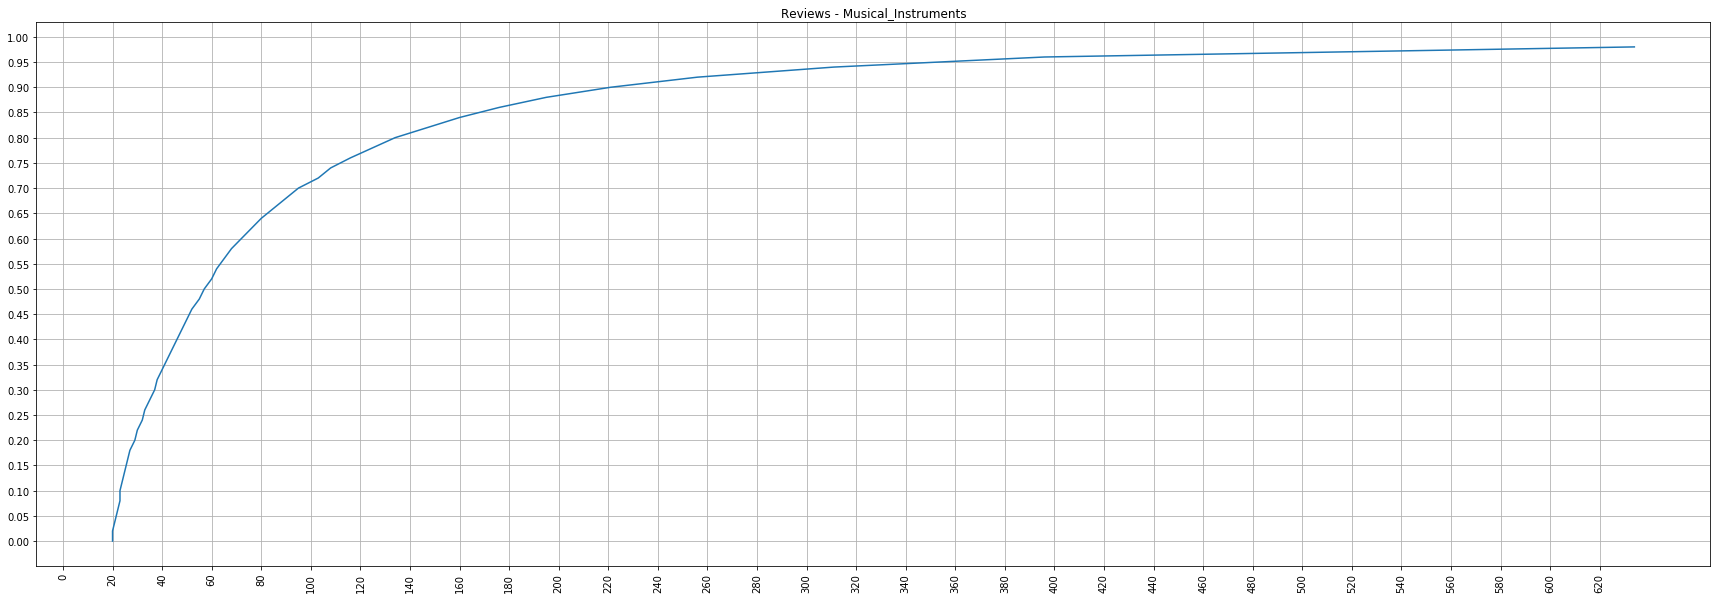

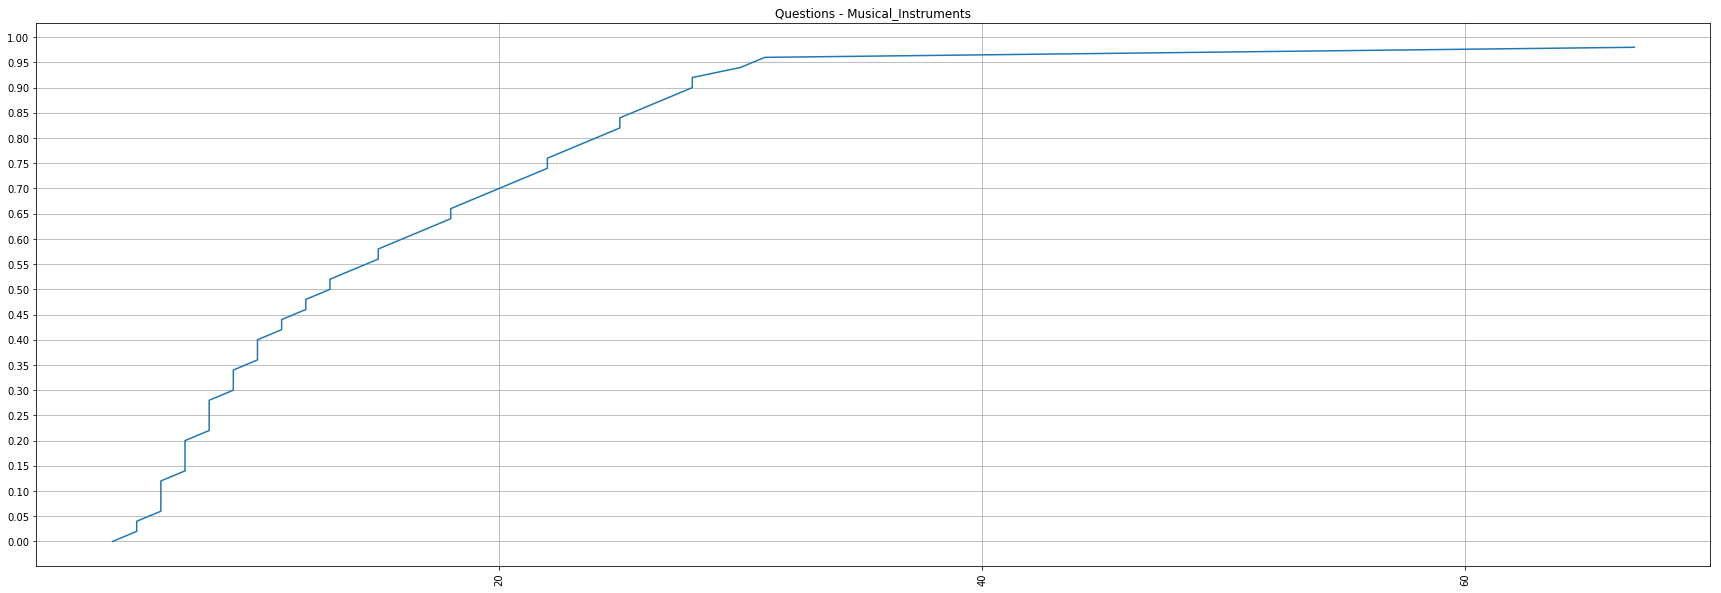

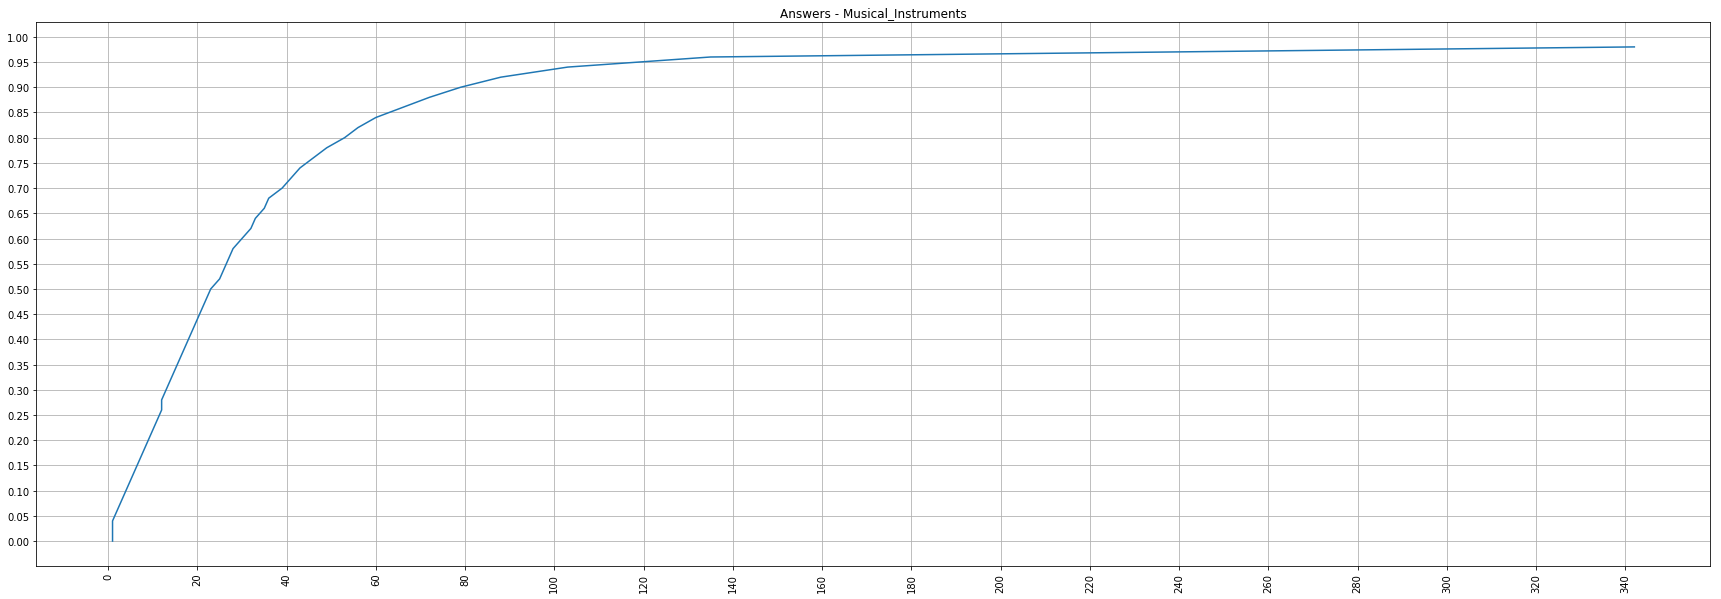

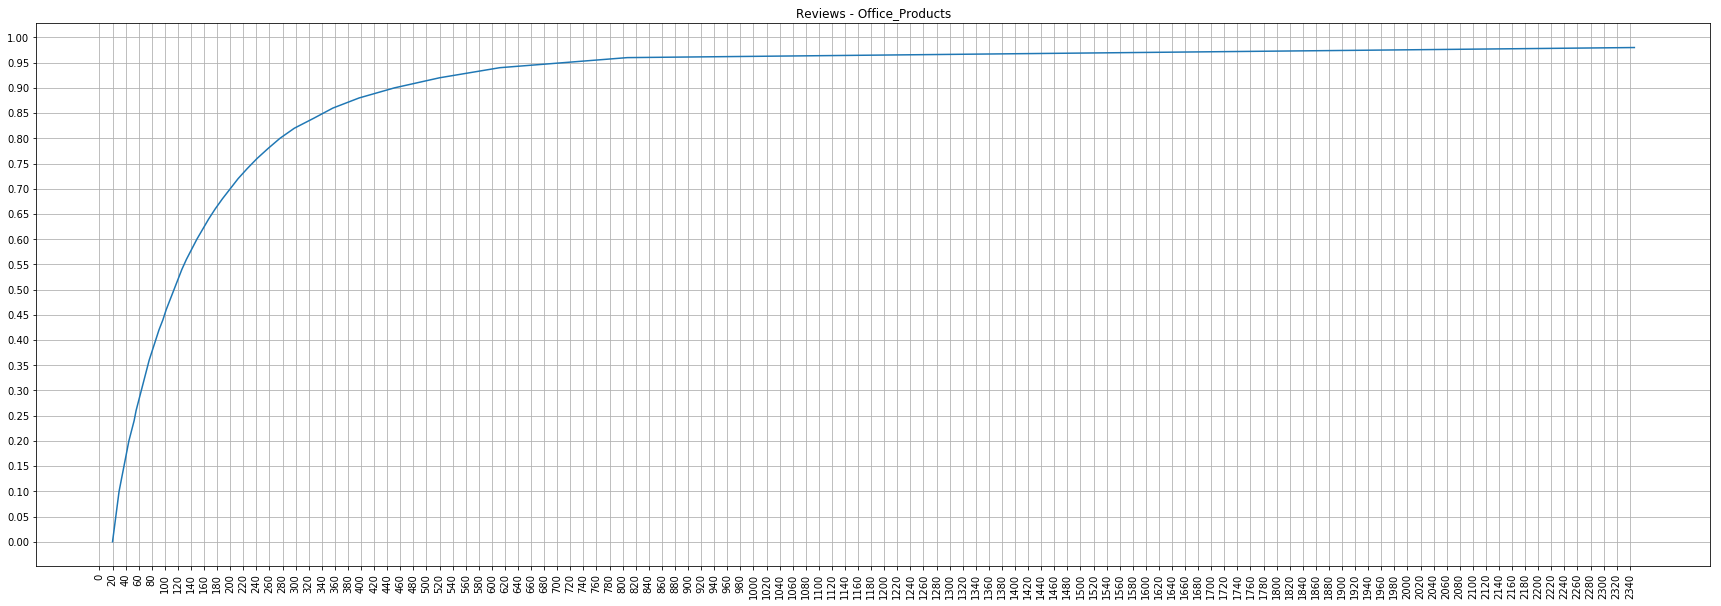

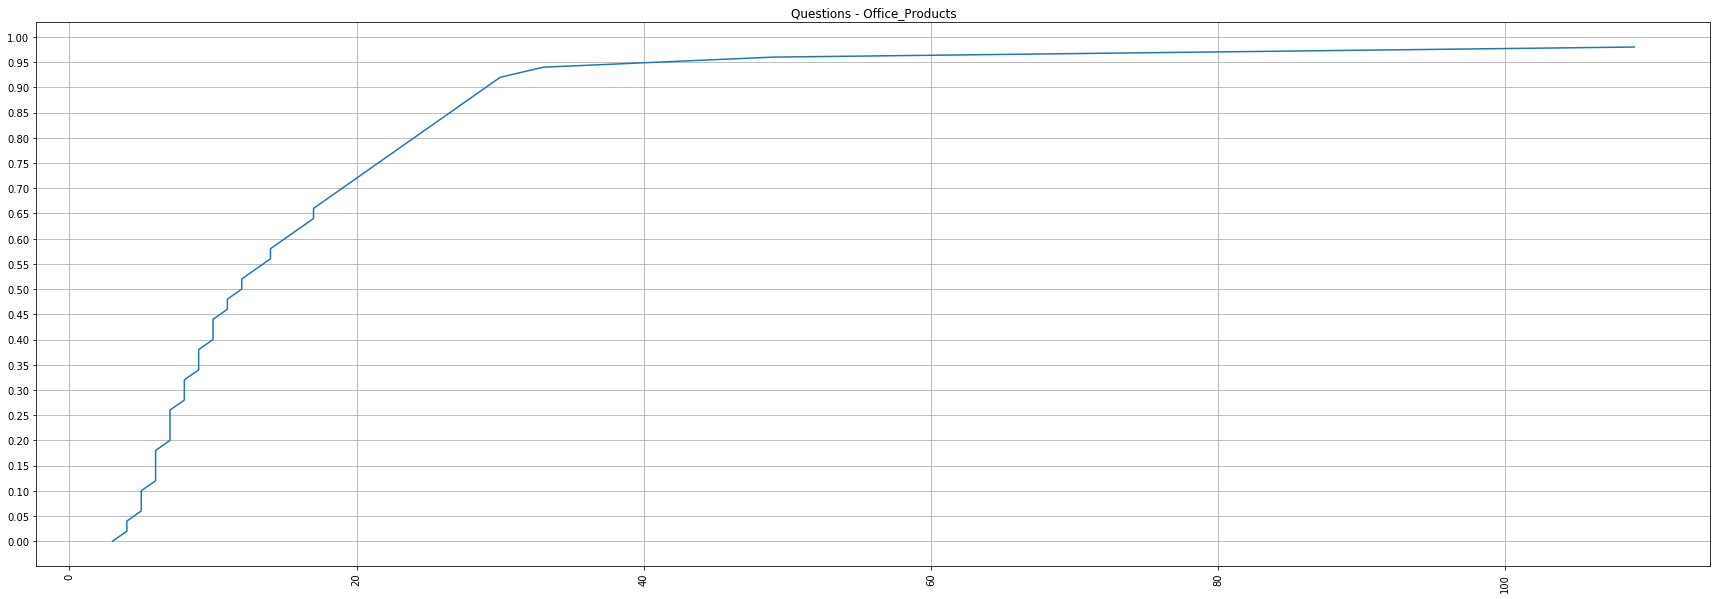

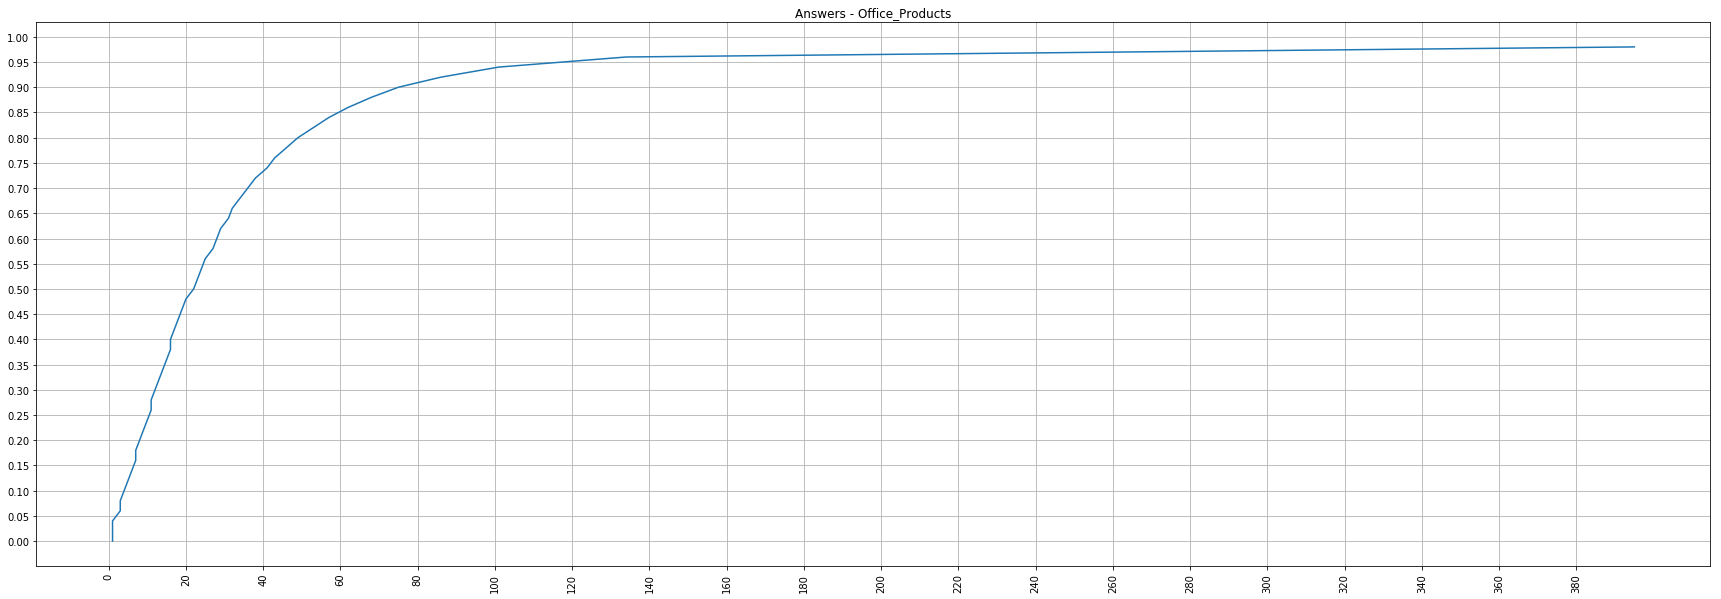

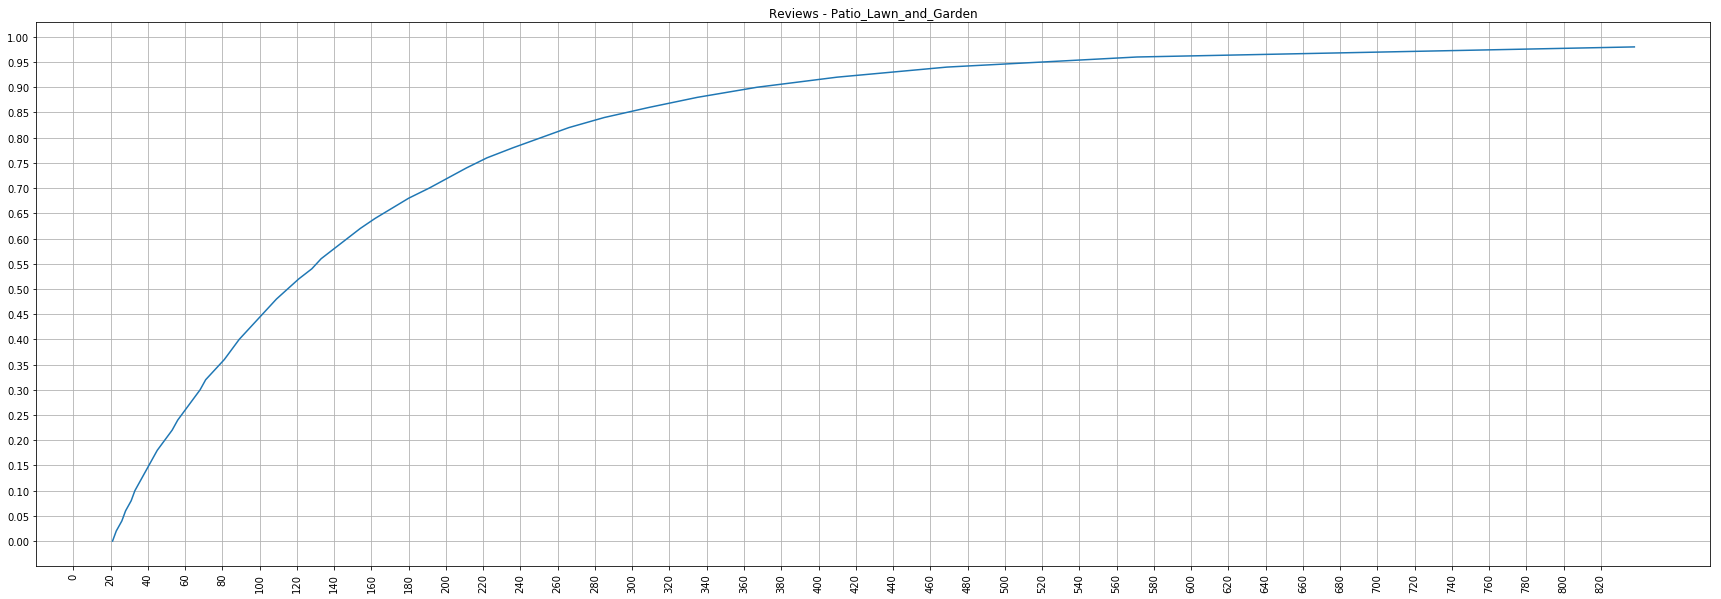

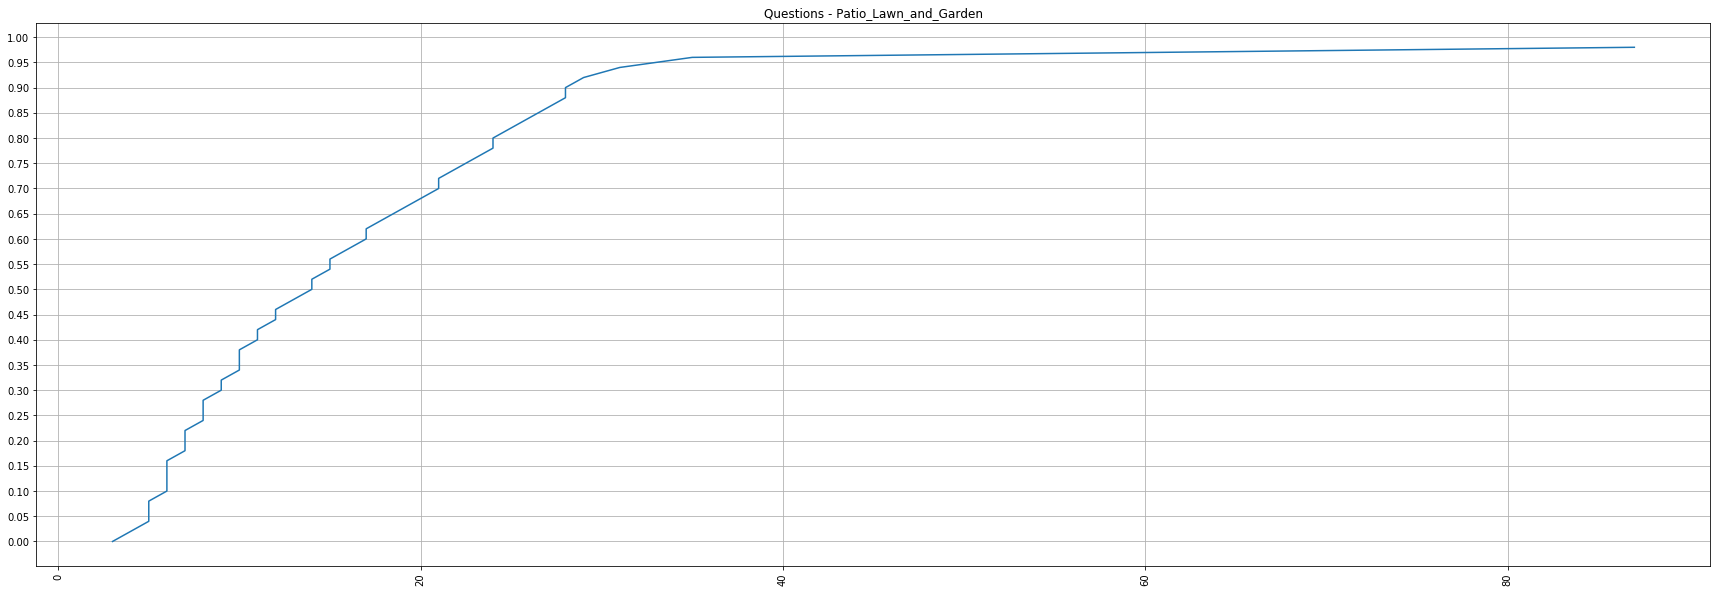

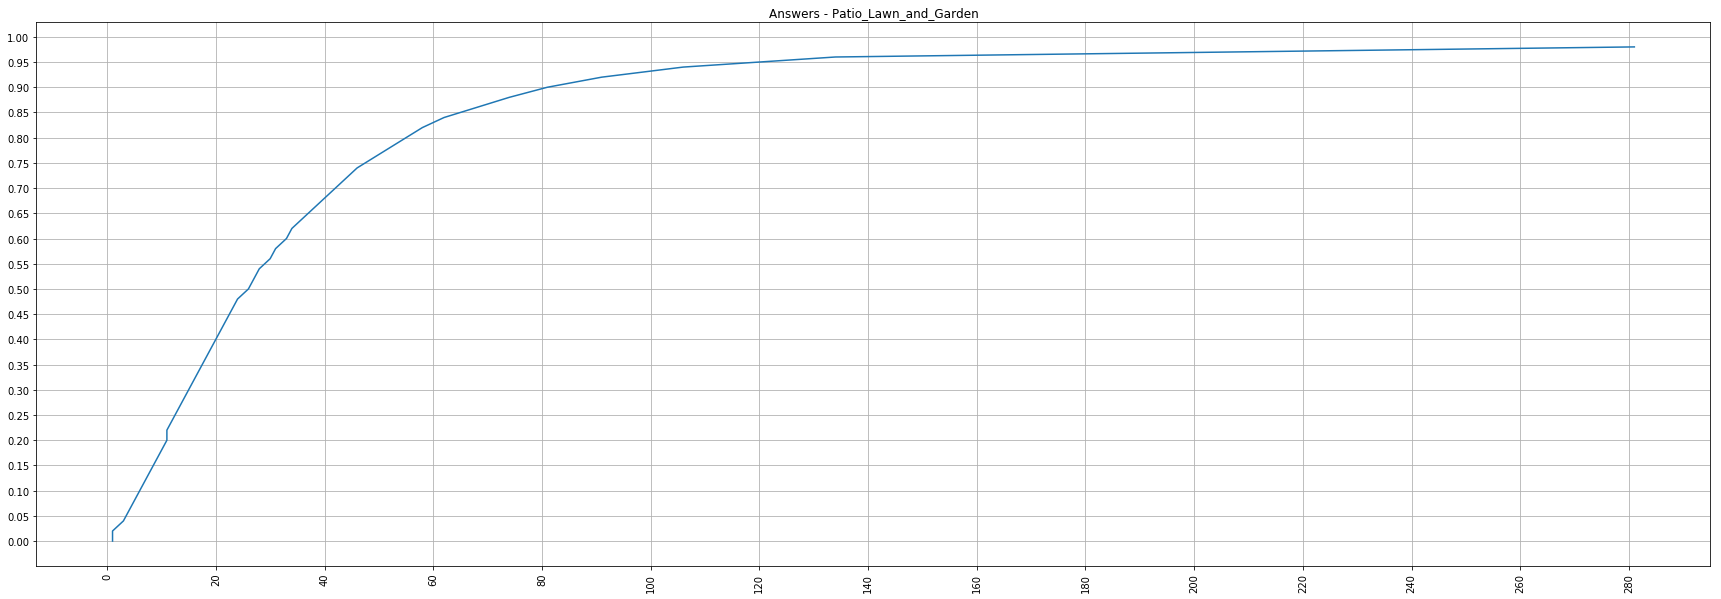

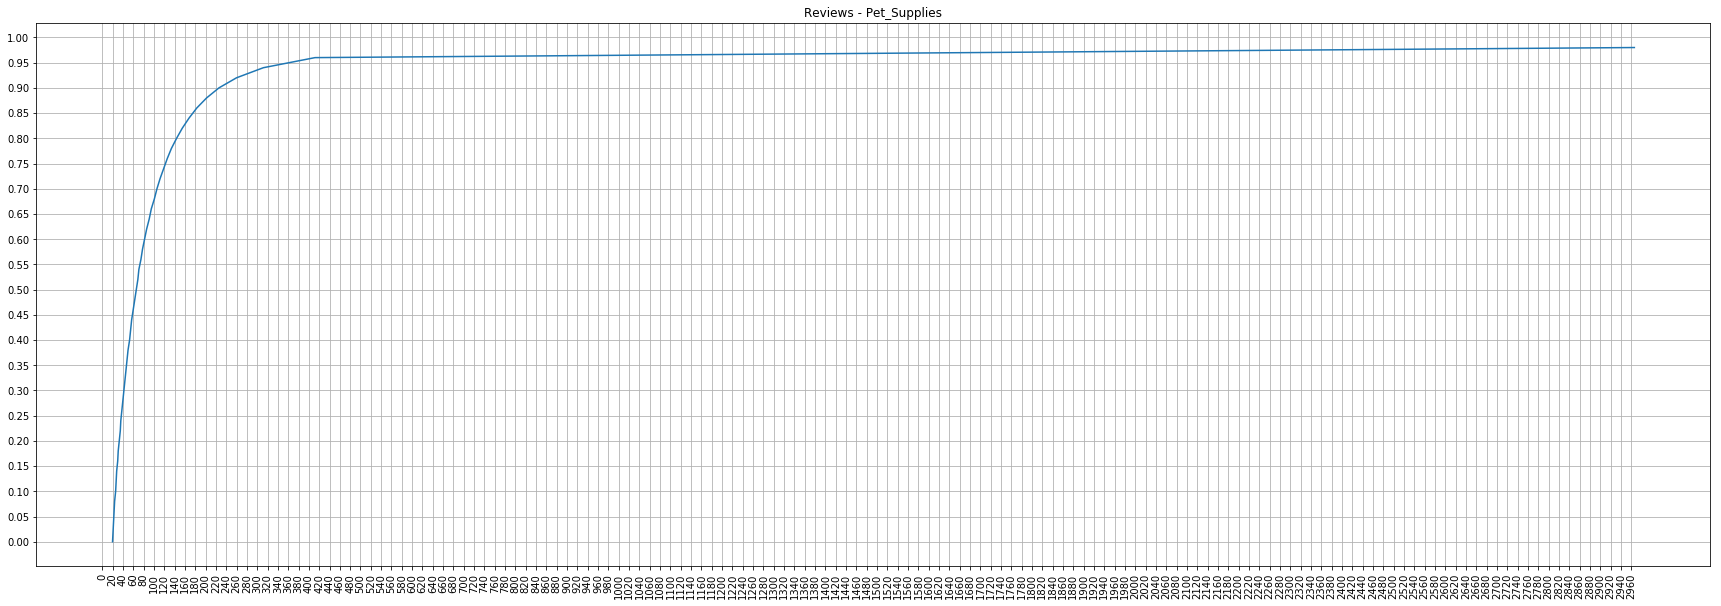

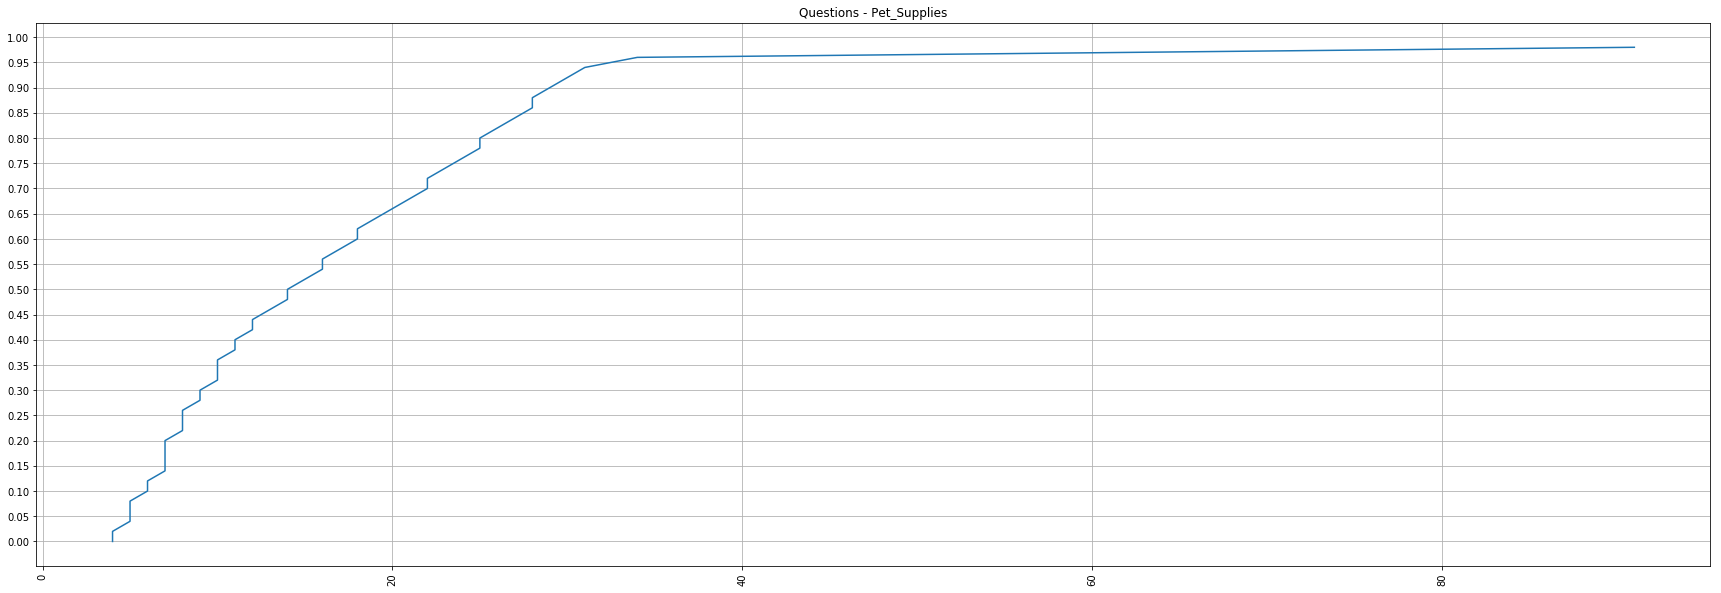

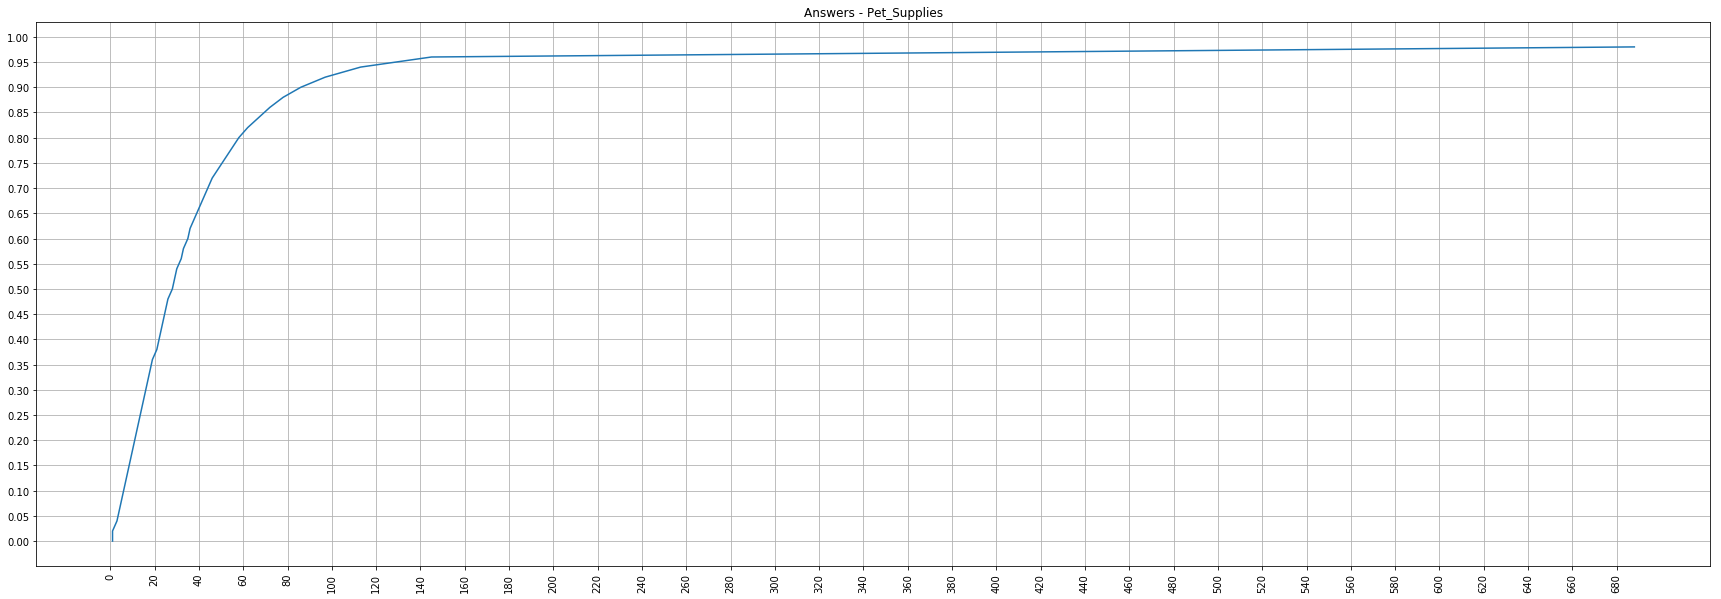

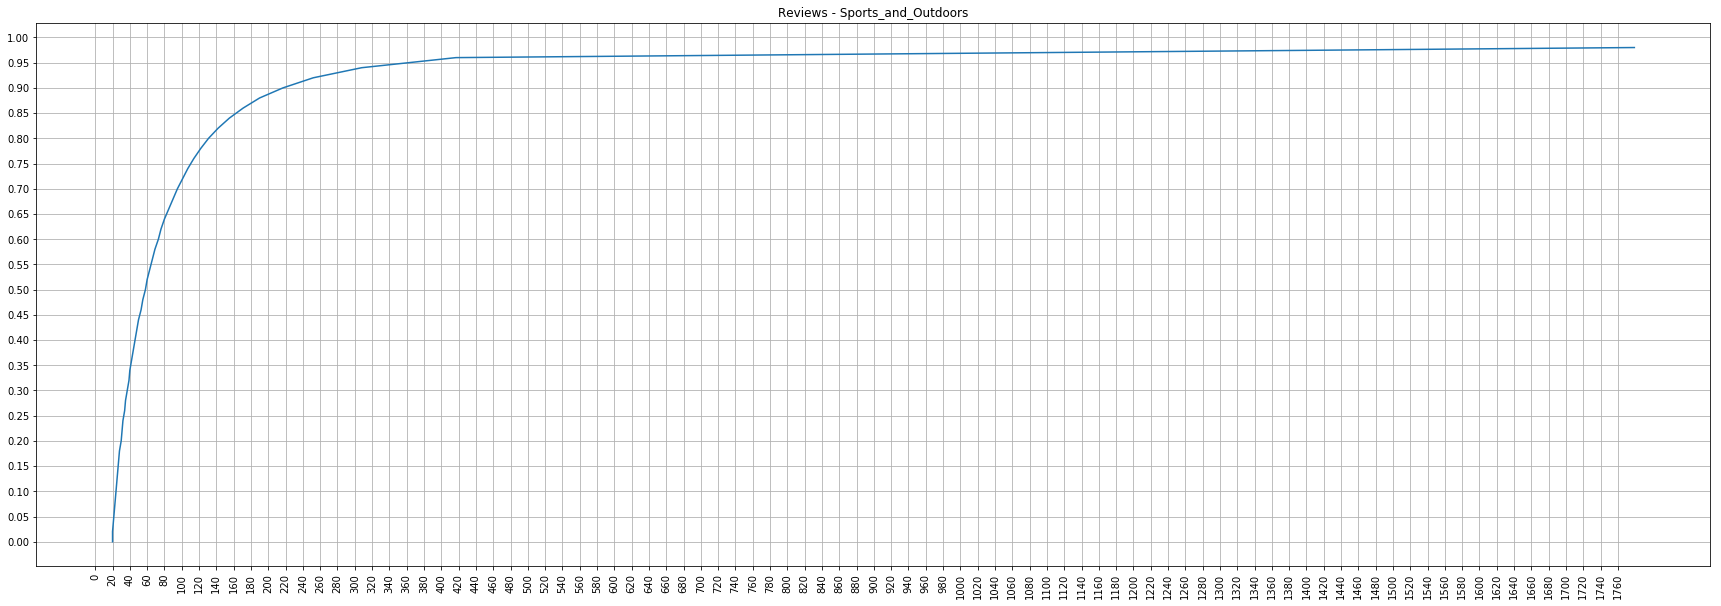

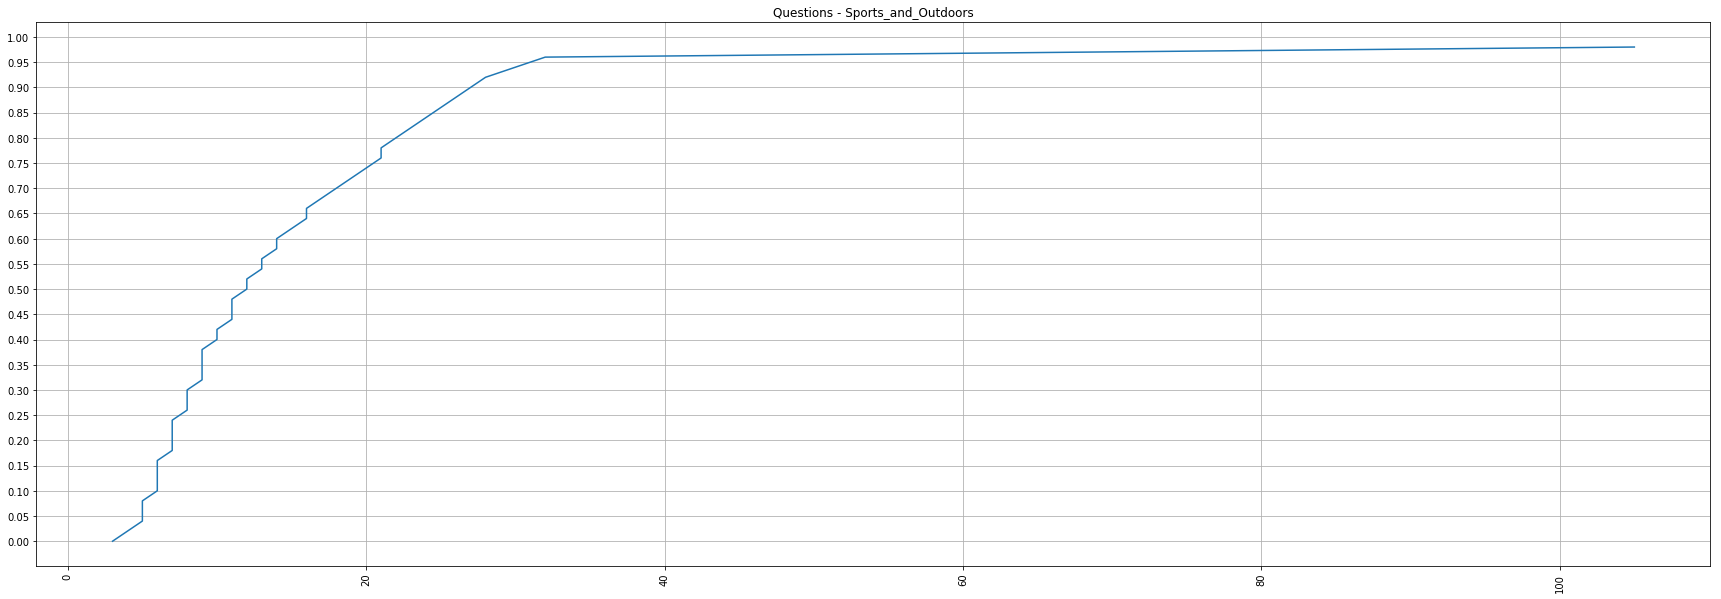

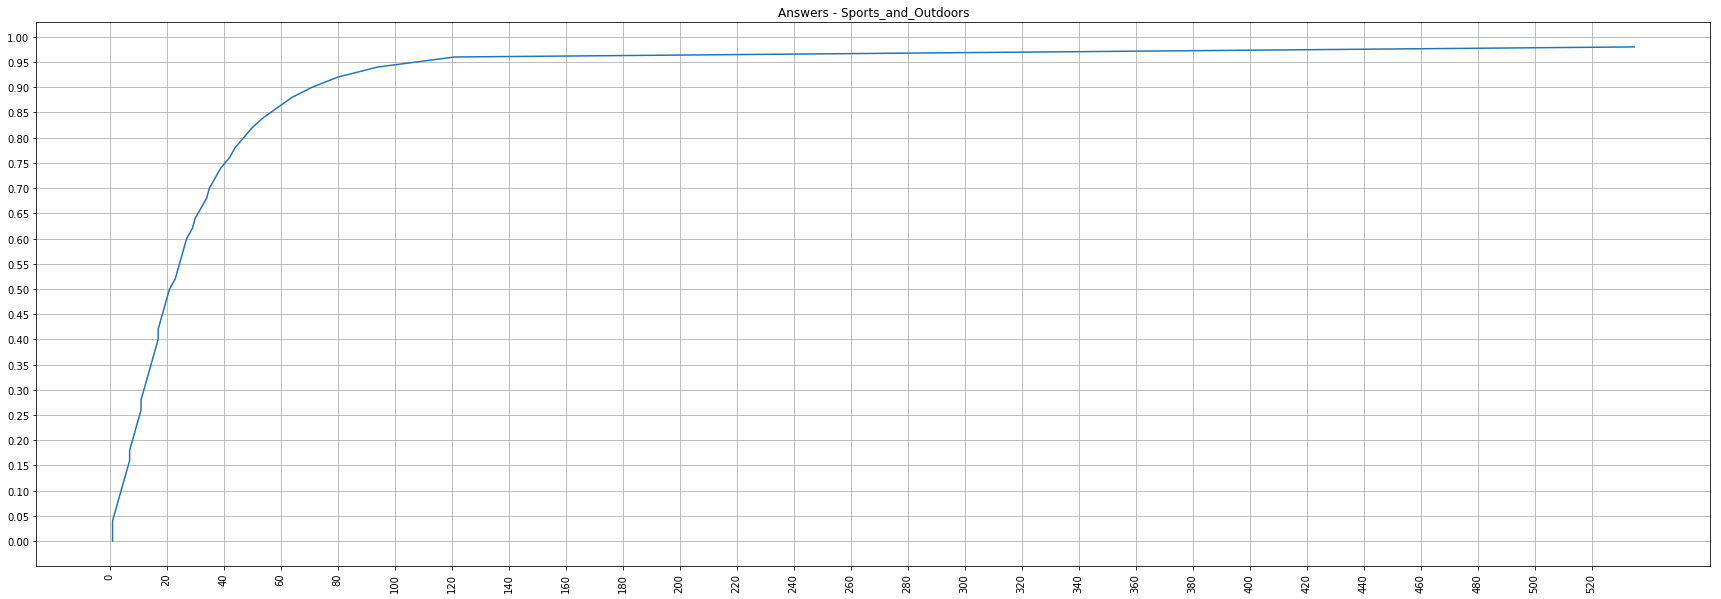

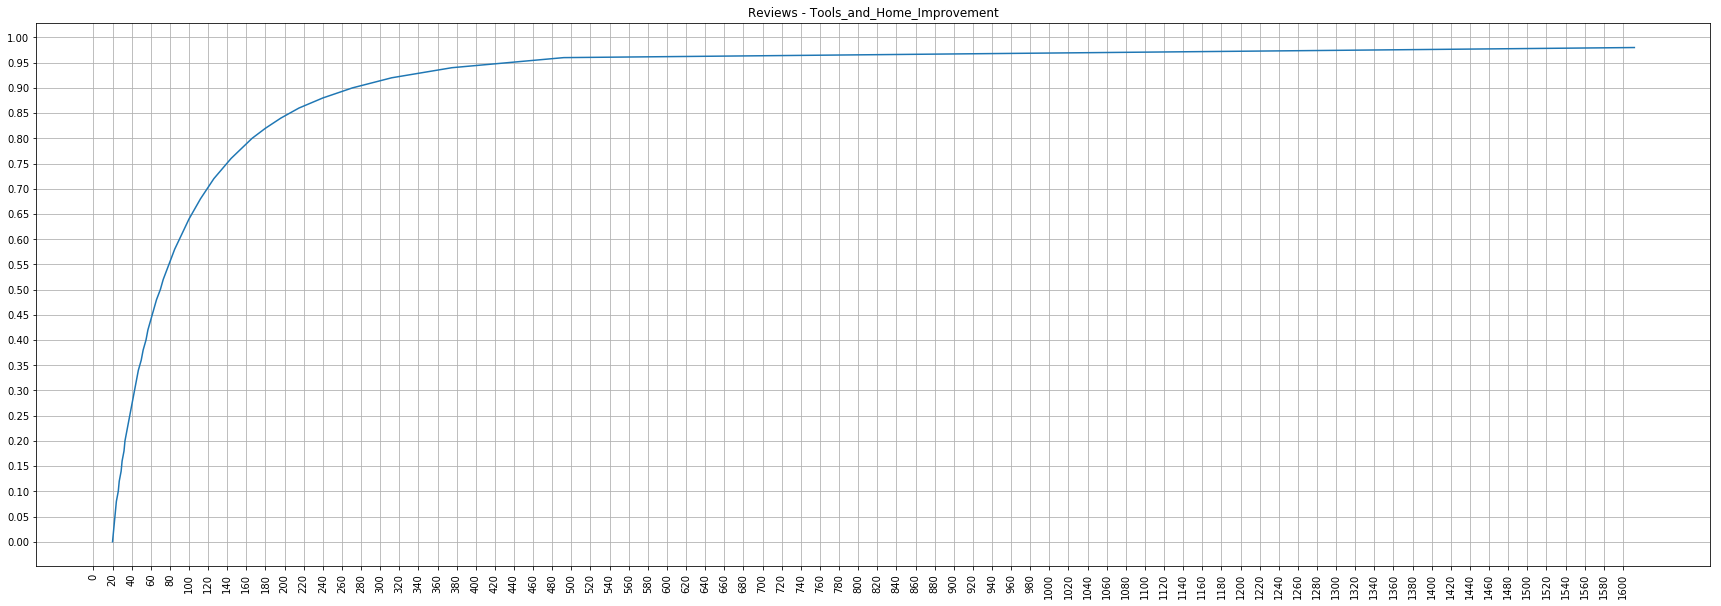

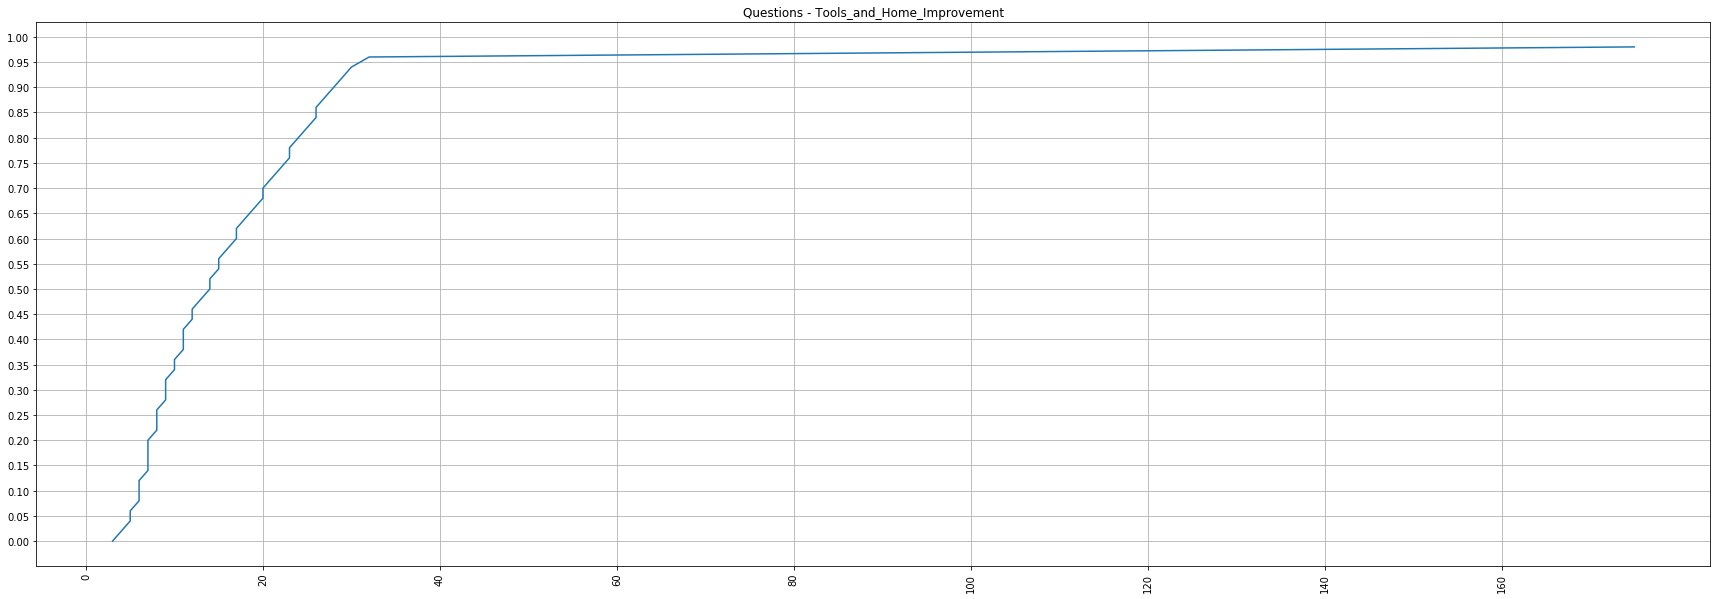

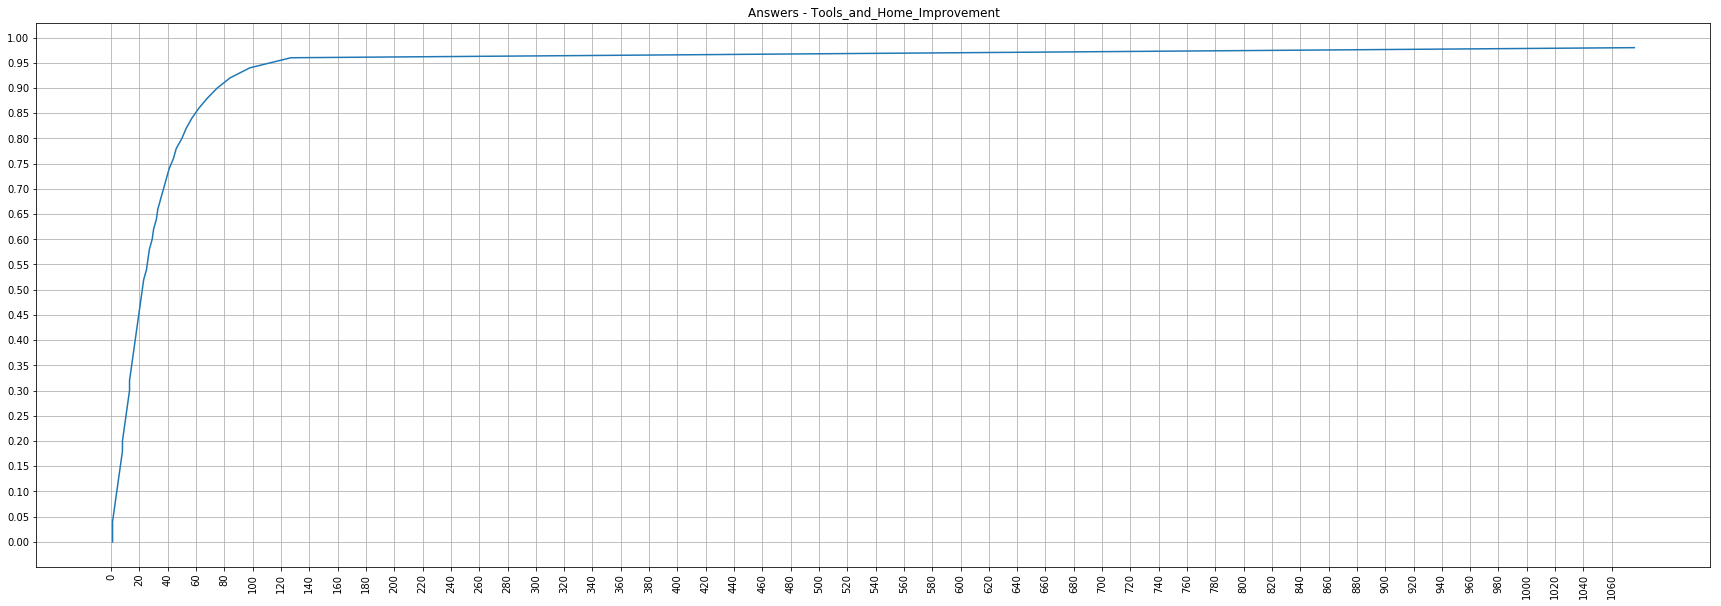

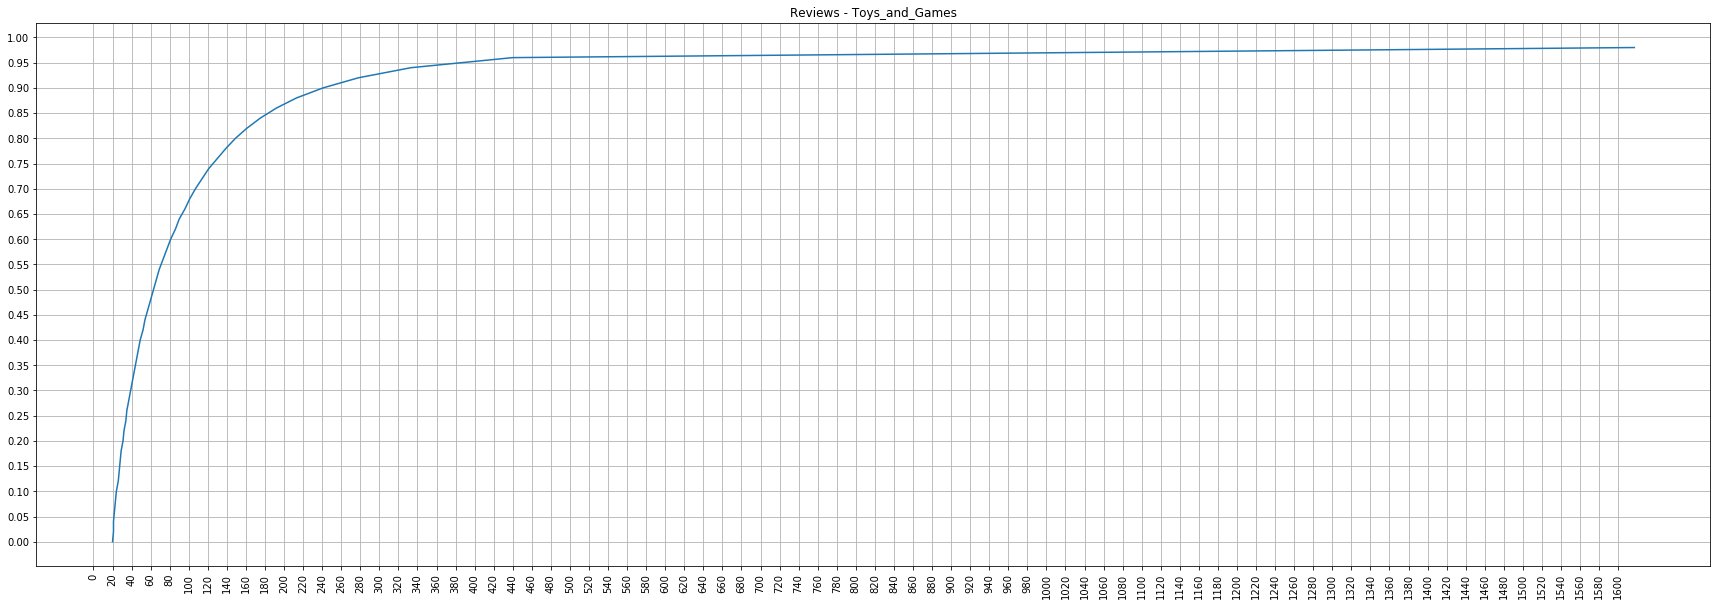

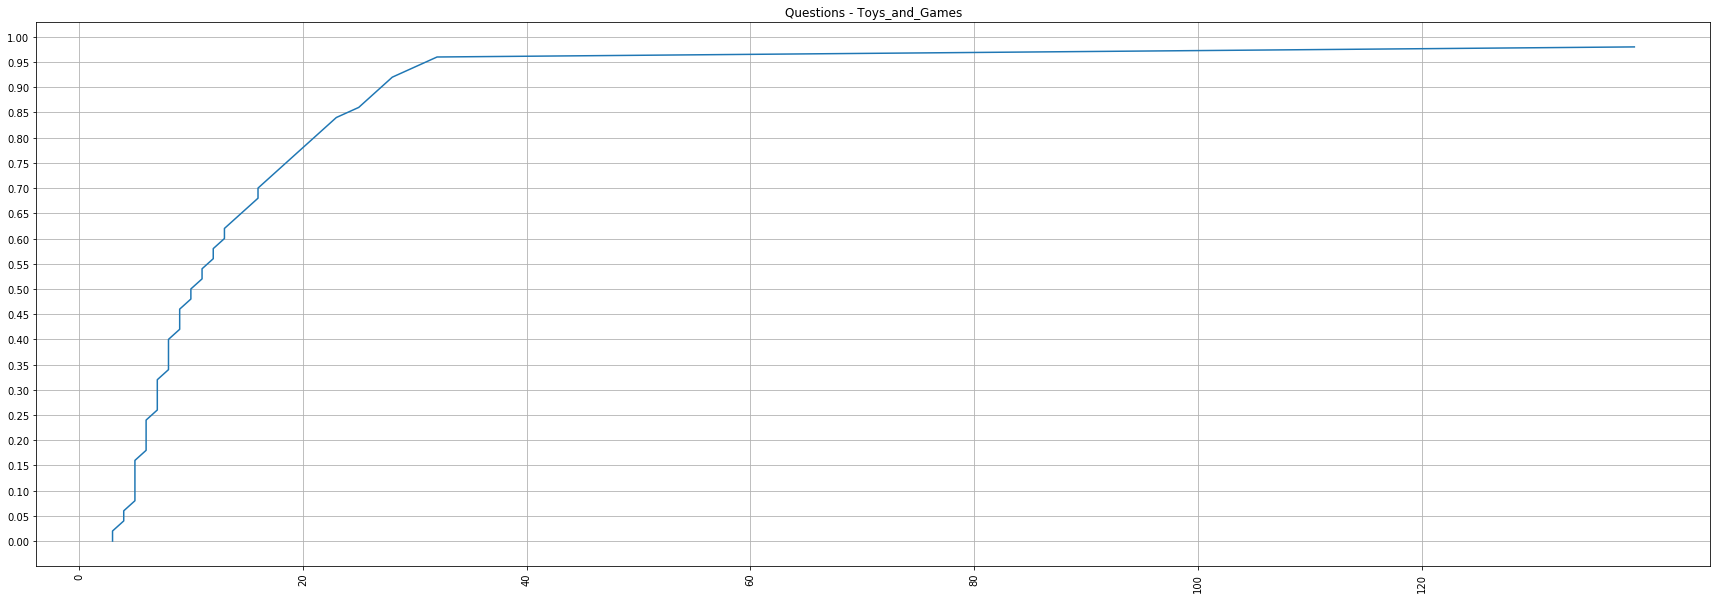

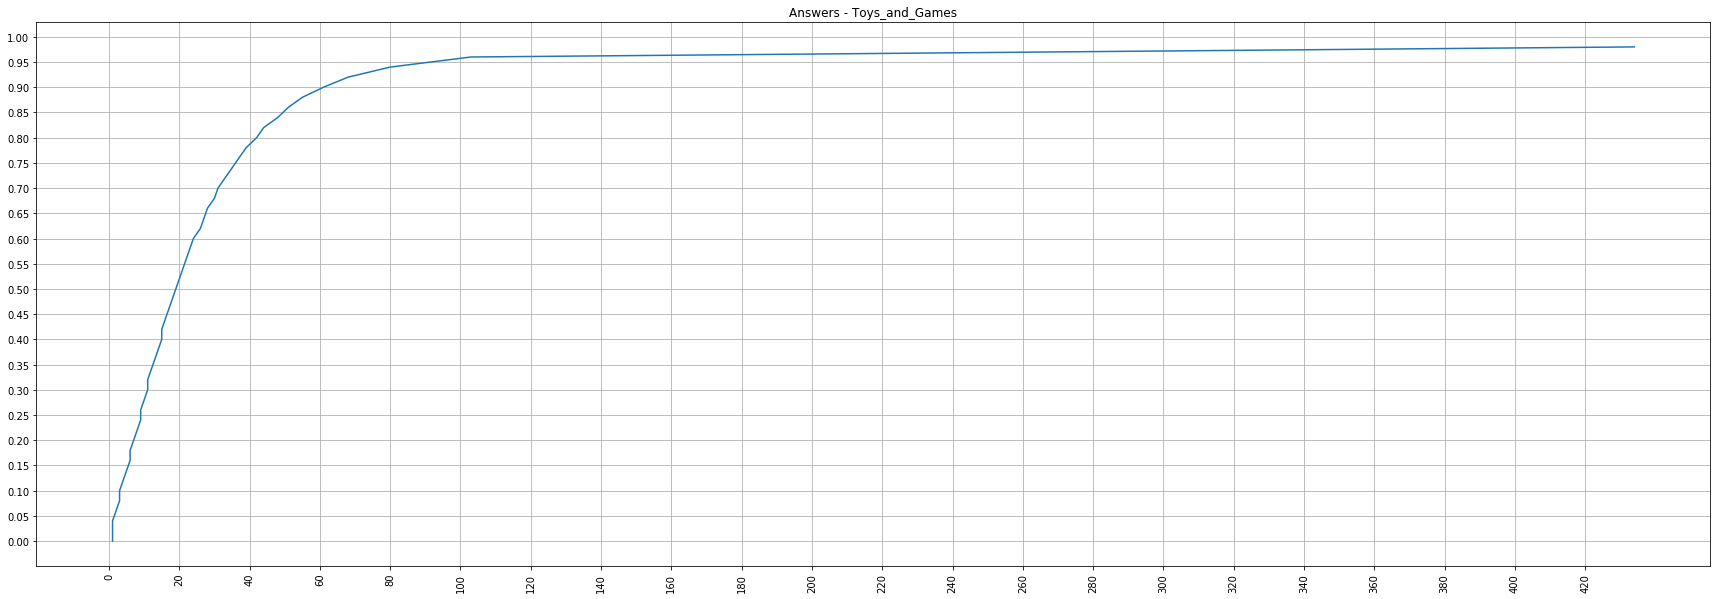

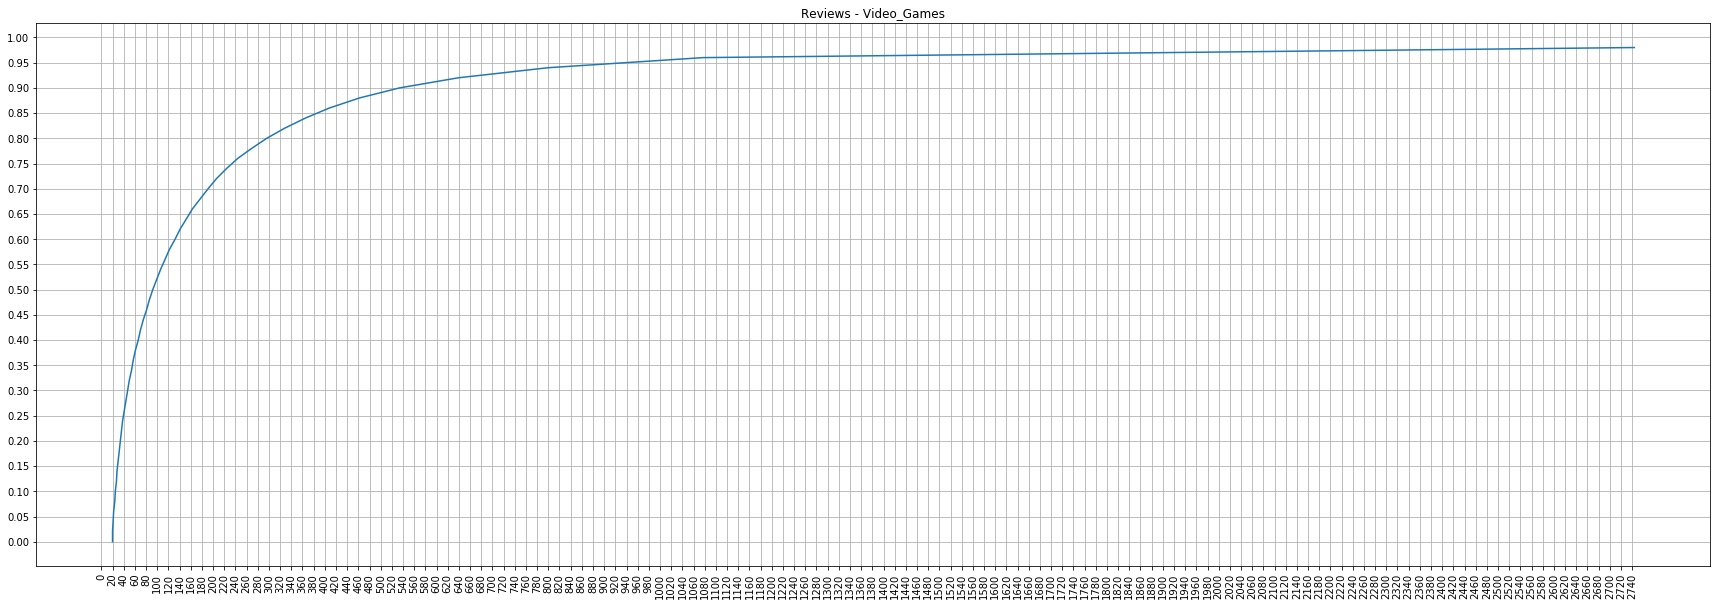

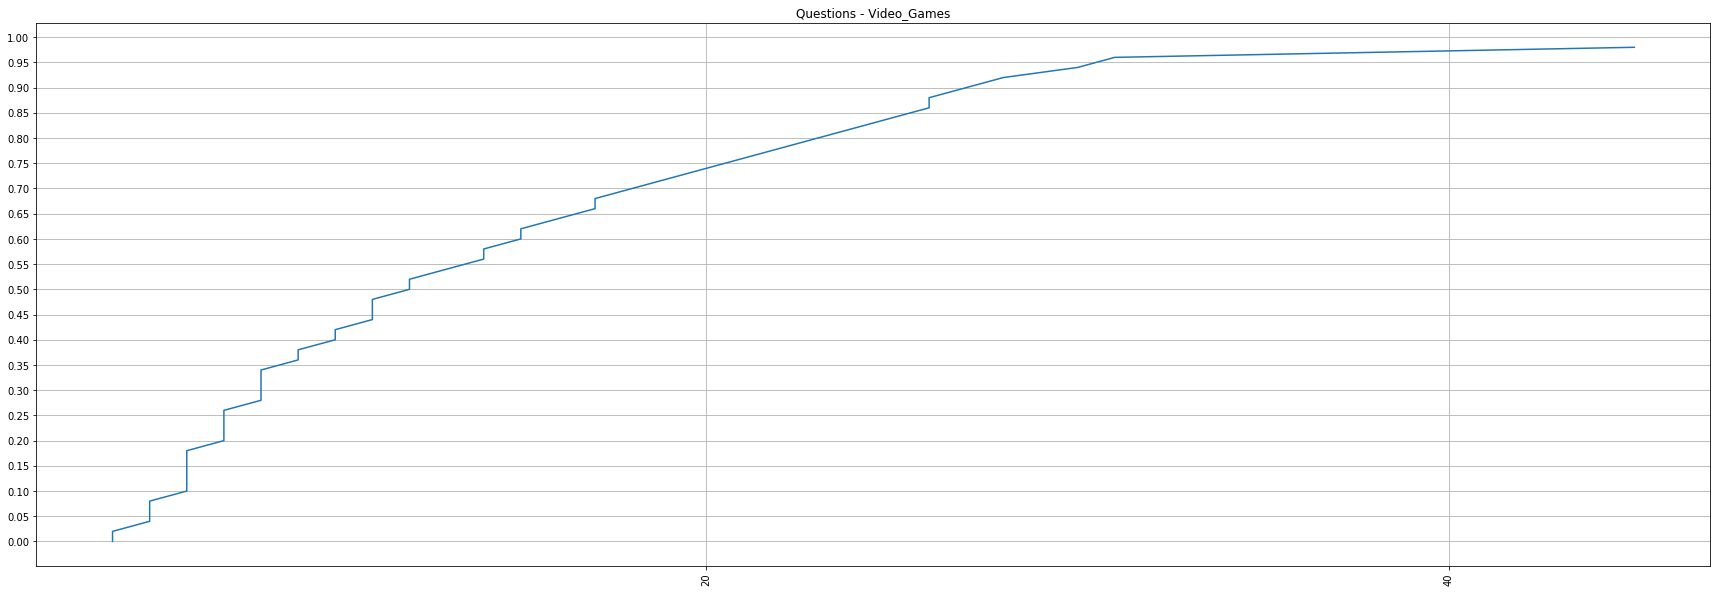

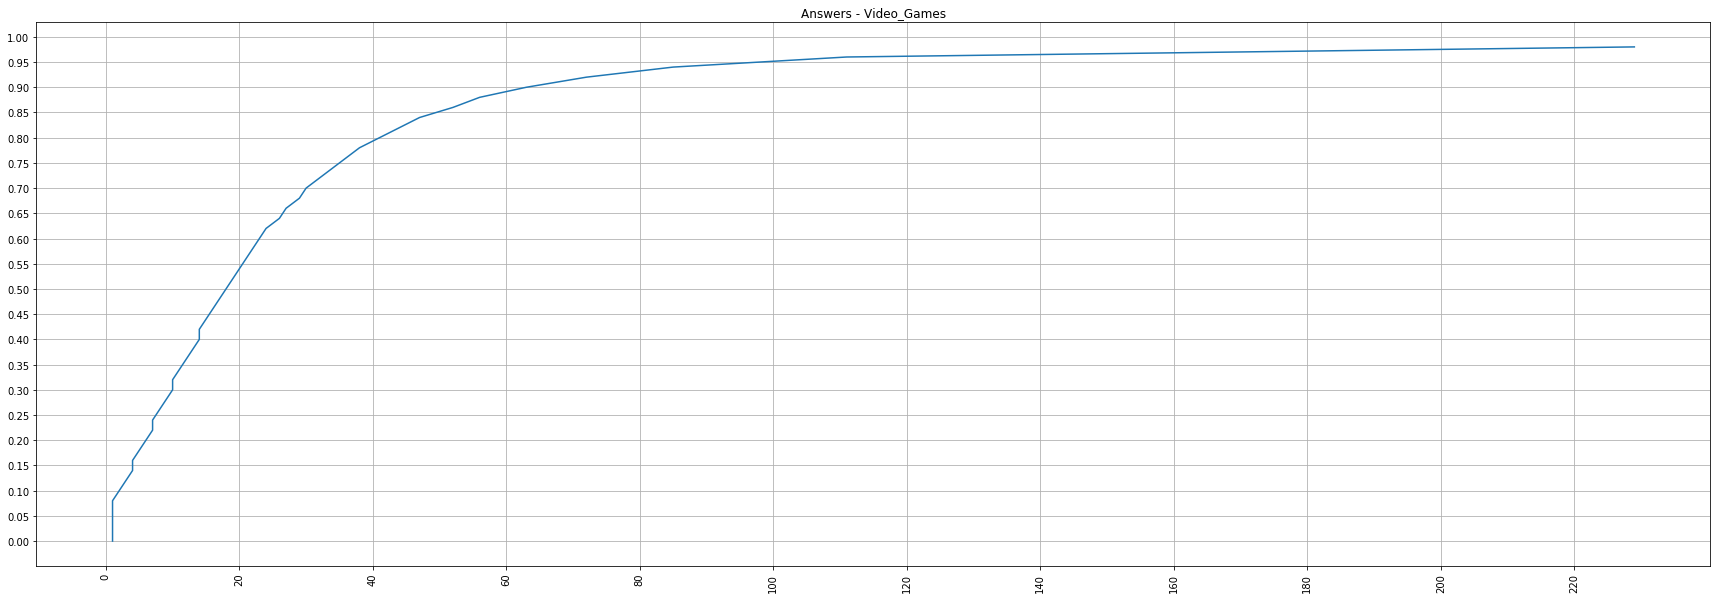

In [12]:
perc_90 = []
def plot_(r, typ, category):
    global perc_90
    xr = np.array(range(len(r))) / len(r)
    perc_90.append(typ + '- ' + category + ' - ' + str(r[-6]))
    plt.figure(figsize=(30, 10))
    plt.title(typ + '- ' + category)
    plt.yticks(np.array(range(0, 110, 5)) / 100)
    plt.xticks(range(0, max(r), 20), rotation=90)
    
    
    plt.grid()
    plt.plot(r, xr)
    
    plt.show()

for category in C.CATEGORIES:
    rl, ql, al = get_length_lists(category)
    r = get_percentiles(rl, 2)
    q = get_percentiles(ql, 2)
    a = get_percentiles(al, 2)
    plot_(r, 'Reviews ', category)
    plot_(q, 'Questions ', category)
    plot_(a, 'Answers ', category)

## 90 percentile is a good enough estimate for all of them

In [13]:
perc_90

['Reviews - Automotive - 185',
 'Questions - Automotive - 27',
 'Answers - Automotive - 66',
 'Reviews - Baby - 219',
 'Questions - Baby - 28',
 'Answers - Baby - 64',
 'Reviews - Beauty - 187',
 'Questions - Beauty - 26',
 'Answers - Beauty - 63',
 'Reviews - Cell_Phones_and_Accessories - 218',
 'Questions - Cell_Phones_and_Accessories - 26',
 'Answers - Cell_Phones_and_Accessories - 53',
 'Reviews - Clothing_Shoes_and_Jewelry - 142',
 'Questions - Clothing_Shoes_and_Jewelry - 25',
 'Answers - Clothing_Shoes_and_Jewelry - 53',
 'Reviews - Electronics - 269',
 'Questions - Electronics - 28',
 'Answers - Electronics - 70',
 'Reviews - Grocery_and_Gourmet_Food - 175',
 'Questions - Grocery_and_Gourmet_Food - 25',
 'Answers - Grocery_and_Gourmet_Food - 63',
 'Reviews - Health_and_Personal_Care - 206',
 'Questions - Health_and_Personal_Care - 26',
 'Answers - Health_and_Personal_Care - 65',
 'Reviews - Home_and_Kitchen - 222',
 'Questions - Home_and_Kitchen - 26',
 'Answers - Home_and_Kitc